In [1]:
%matplotlib inline
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         18 hours 49 mins
H2O_cluster_timezone:       Europe/Prague
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.0.1
H2O_cluster_version_age:    6 days
H2O_cluster_name:           H2O_from_python_tomasfryda_adx1nz
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.687 Gb
H2O_cluster_total_cores:    16
H2O_cluster_allowed_cores:  16
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.5.9 final
--------------------------  ------------------------------------------------------------------

In [3]:
df = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/wine/winequality-redwhite-no-BOM.csv")

response = "quality"

predictors = [
  "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide",
  "total sulfur dioxide", "density", "pH", "sulphates", "alcohol",  "type"
]


train, test = df.split_frame(seed=1)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(x=predictors, y=response, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [5]:
aml.leaderboard

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 StackedEnsemble_AllModels_AutoML_20201015_150955 0.374866 0.612263 0.374866 0.430019 0.0929193 
 StackedEnsemble_BestOfFamily_AutoML_20201015_150955 0.377752 0.614616 0.377752 0.434258 0.093245 
 XRT_1_AutoML_20201015_150955 0.384959 0.62045 0.384959 0.44955 0.0942558 
 DRF_1_AutoML_20201015_150955 0.387688 0.622646 0.387688 0.451327 0.0946572 
 GBM_grid__1_AutoML_20201015_150955_model_62 0.397921 0.63081 0.397921 0.423871 0.0957819 
 GBM_grid__1_AutoML_20201015_150955_model_47 0.399524 0.632079 0.399524 0.435952 0.0958916 
 GBM_grid__1_AutoML_20201015_150955_model_22 0.400356 0.632737 0.400356 0.42541 0.0959897 
 GBM_grid__1_AutoML_20201015_150955_model_61 0.402673 0.634565 0.402673 0.433498 0.0965175 
 GBM_grid__1_AutoML_20201015_150955_model_78 0.405598 0.636866 0.405598 0.463236 0.0964935 
 GBM_grid__1_AutoML_20201015_150955_model_56 0.405722 0.636963 0.405722 0.46403 0.09647

----
# Explain H2OAutoML

## Global Explanation

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mean_residual_deviance rmse mse mae rmsle training_time_ms predict_time_per_row_ms 
 
 
 StackedEnsemble_AllModels_AutoML_20201015_150955 0.374866 0.612263 0.374866 0.430019 0.0929193 378 0.024668 
 StackedEnsemble_BestOfFamily_AutoML_20201015_150955 0.377752 0.614616 0.377752 0.434258 0.093245 164 0.011682 
 XRT_1_AutoML_20201015_150955 0.384959 0.62045 0.384959 0.44955 0.0942558 702 0.003335 
 DRF_1_AutoML_20201015_150955 0.387688 0.622646 0.387688 0.451327 0.0946572 479 0.003064 
 GBM_grid__1_AutoML_20201015_150955_model_62 0.397921 0.63081 0.397921 0.423871 0.0957819 1726 0.003082 
 GBM_grid__1_AutoML_20201015_150955_model_47 0.399524 0.632079 0.399524 0.435952 0.0958916 728 0.002905 
 GBM_grid__1_AutoML_20201015_150955_model_22 0.400356 0.632737 0.400356 0.42541 0.0959897 1183 0.002627 
 GBM_grid__1_AutoML_20201015_150955_model_61 0.402673 0.634565 0.402673 0.433498 0.0965175 817 0.003155 
 GBM_grid__1_AutoML_20201015_150955_model_78 0.405598 0.636866 0.405598 0.463236 0.0964935 513 0.00363 
 GBM_grid__1_AutoML_20201015_150955_model_56 0.405722 0.636963 0.405722 0.46403 0.09647 627 0.003939 
 GBM_grid__1_AutoML_20201015_150955_model_54 0.407852 0.638633 0.407852 0.47376 0.096684 427 0.002581 
 GBM_grid__1_AutoML_20201015_150955_model_28 0.408909 0.63946 0.408909 0.472672 0.0968268 356 0.00244 
 GBM_grid__1_AutoML_20201015_150955_model_13 0.409613 0.64001 0.409613 0.466772 0.0969922 380 0.003794 
 GBM_grid__1_AutoML_20201015_150955_model_49 0.41201 0.64188 0.41201 0.4796 0.097143 327 0.002807 
 GBM_grid__1_AutoML_20201015_150955_model_23 0.412288 0.642097 0.412288 0.47338 0.097143 474 0.00342 
 GBM_grid__1_AutoML_20201015_150955_model_77 0.41234 0.642137 0.41234 0.468143 0.0972328 582 0.003081 
 GBM_grid__1_AutoML_20201015_150955_model_59 0.412541 0.642294 0.412541 0.469452 0.0974813 717 0.003536 
 GBM_grid__1_AutoML_20201015_150955_model_24 0.41306 0.642698 0.41306 0.478071 0.0971339 361 0.003276 
 GBM_grid__1_AutoML_20201015_150955_model_39 0.413782 0.643259 0.413782 0.466026 0.0975326 492 0.002873 
 GBM_grid__1_AutoML_20201015_150955_model_48 0.414432 0.643764 0.414432 0.460166 0.0976143 674 0.003411

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

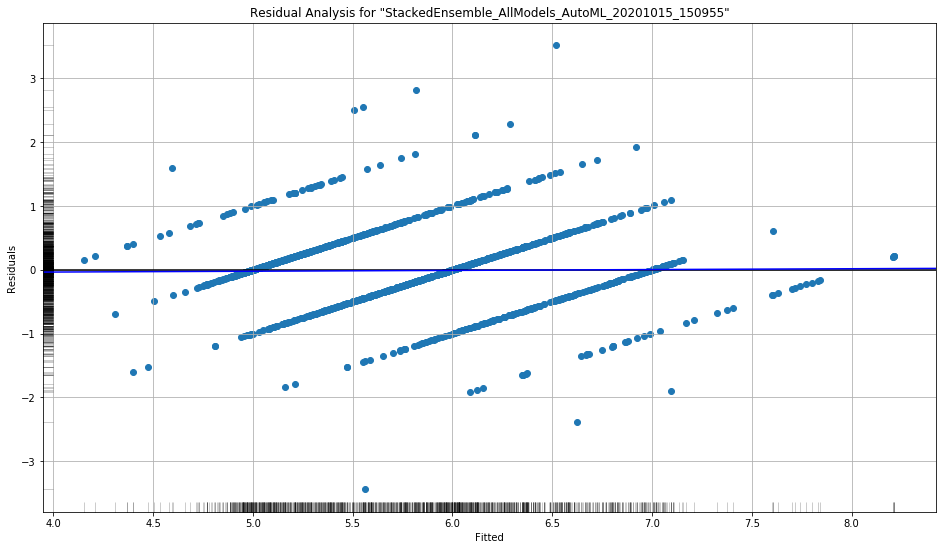

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

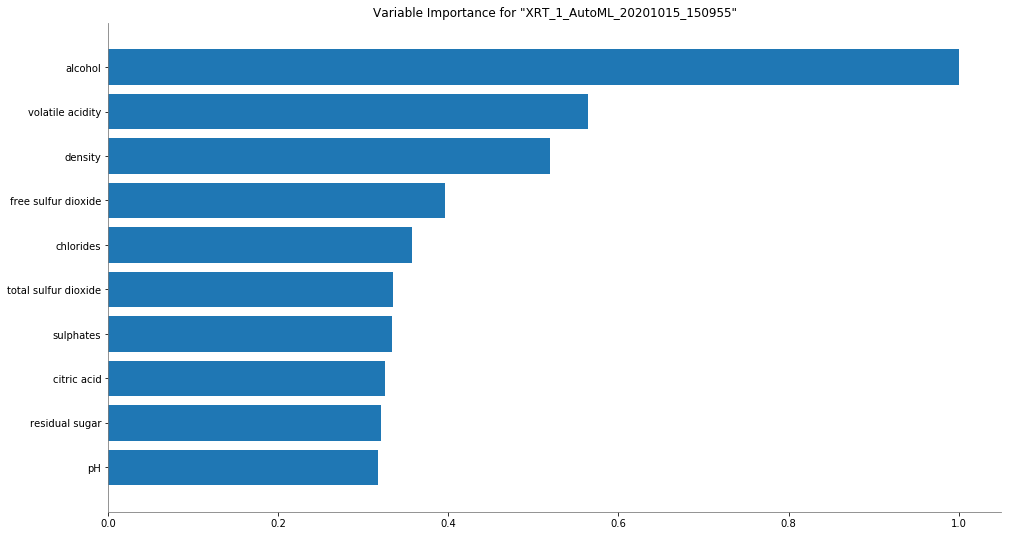

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

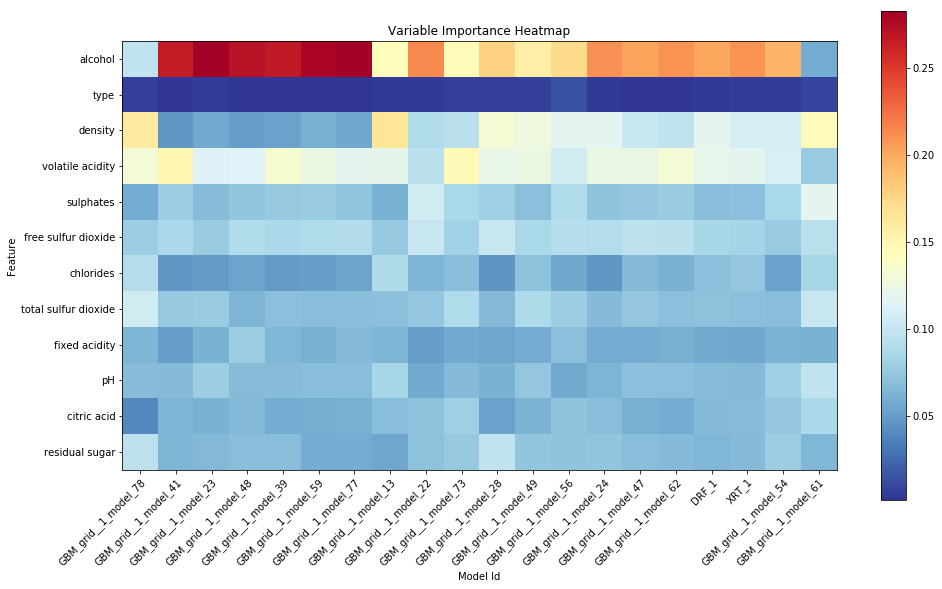

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

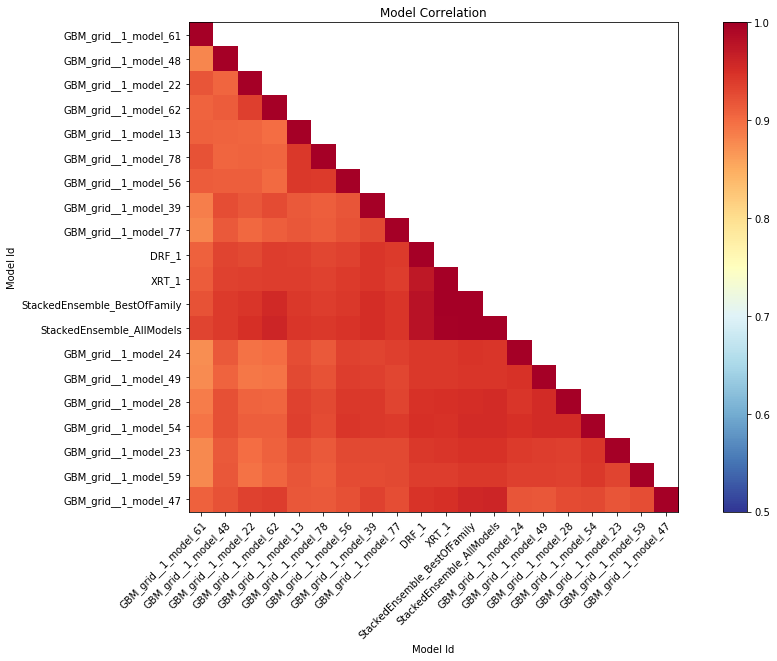

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

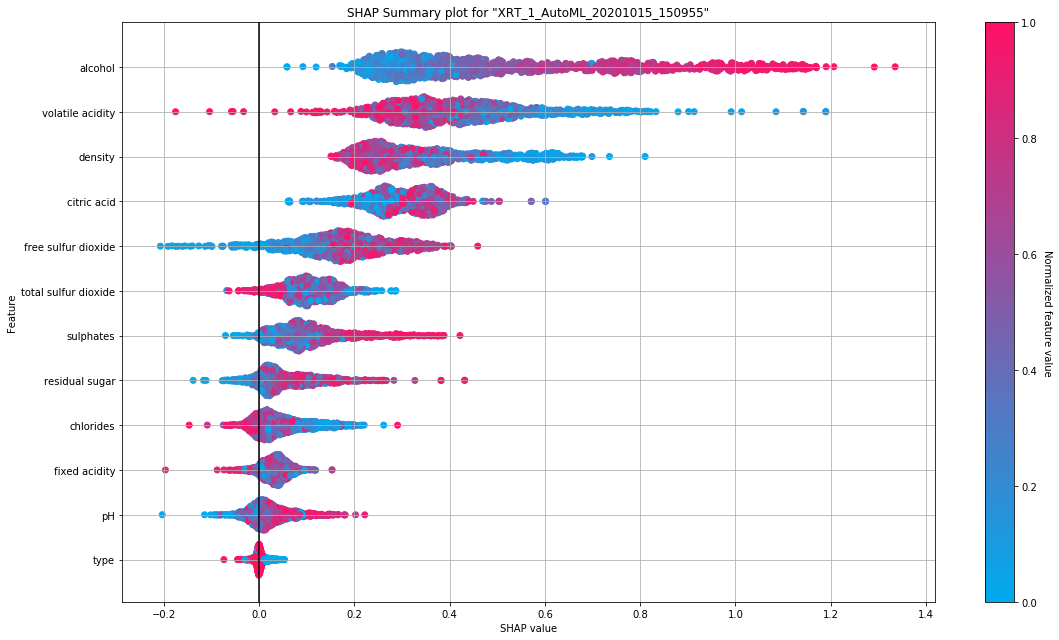

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

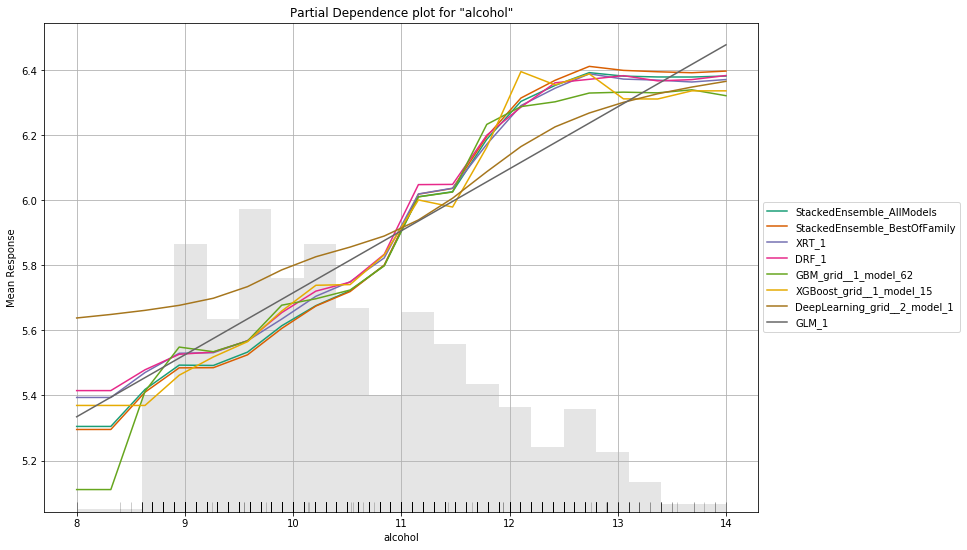

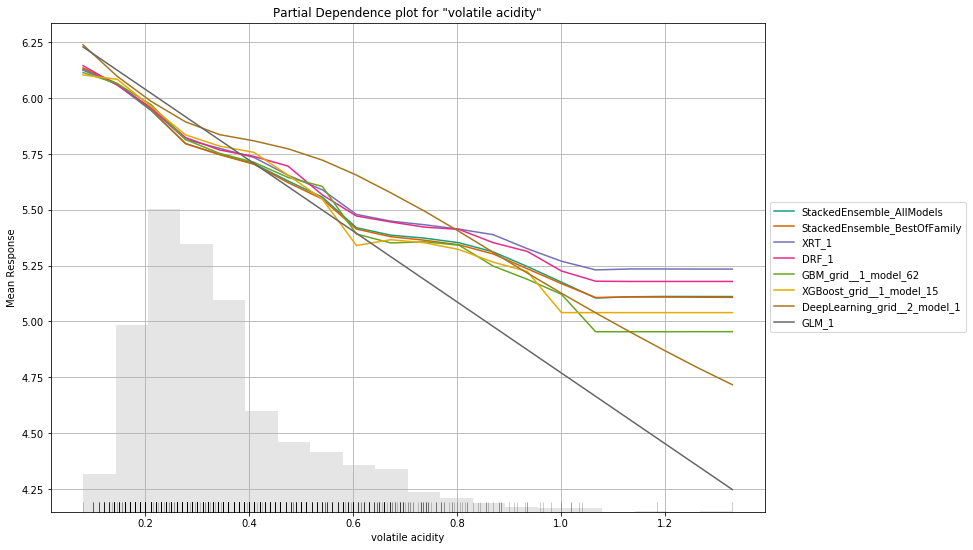

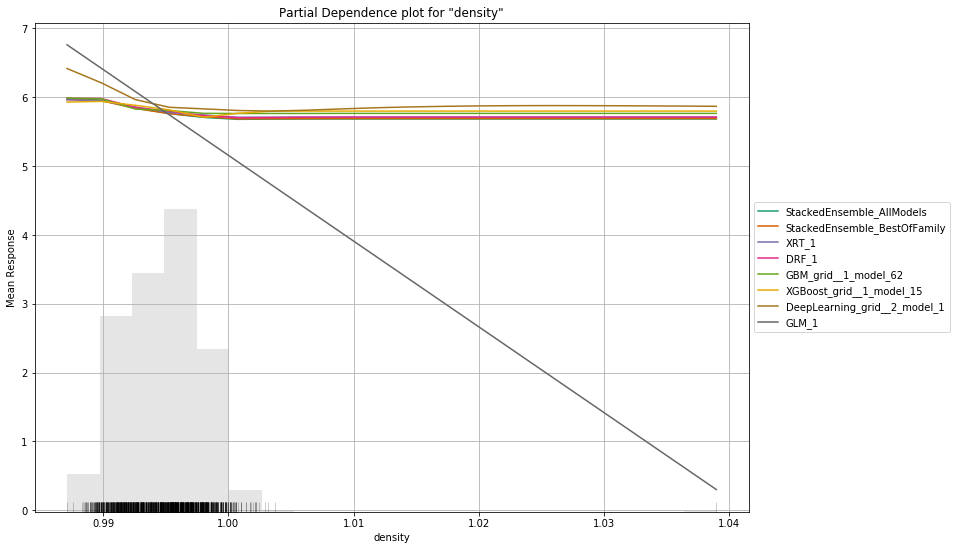

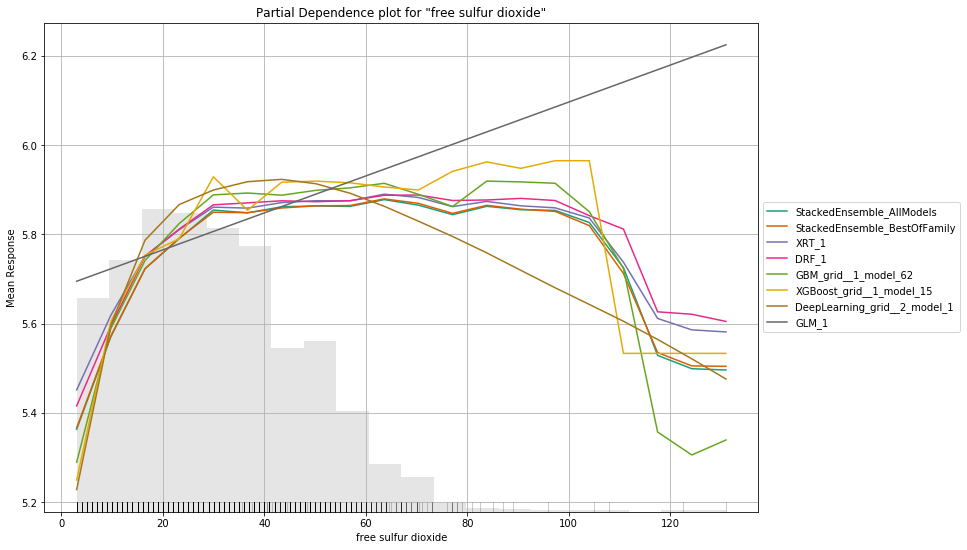

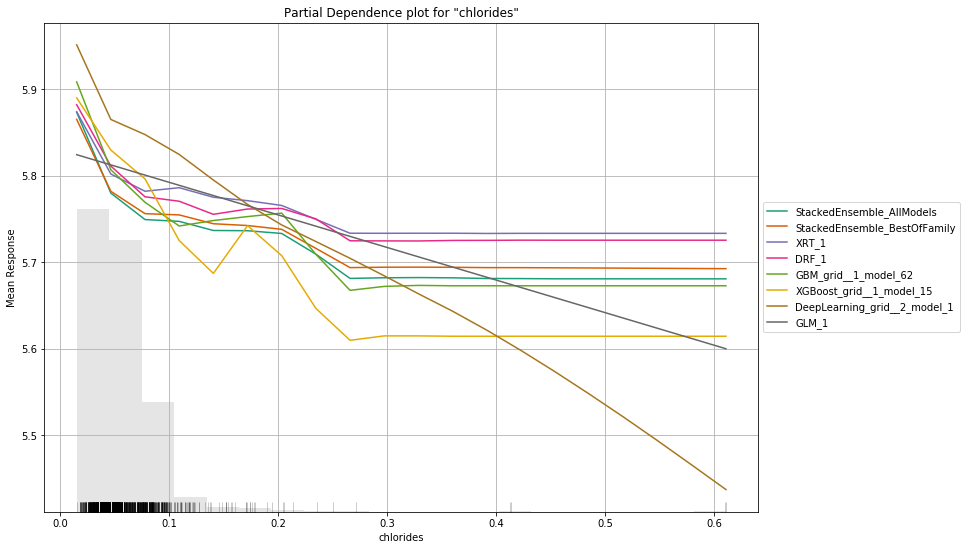

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

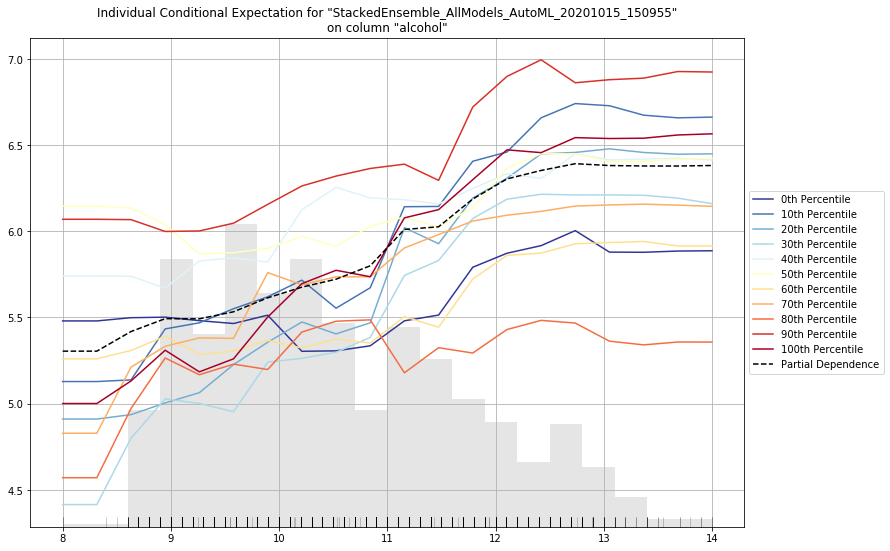

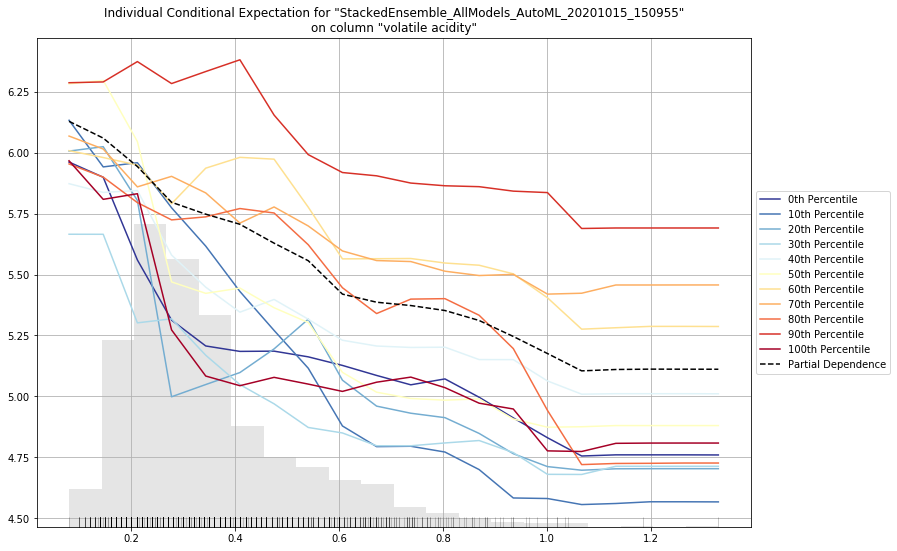

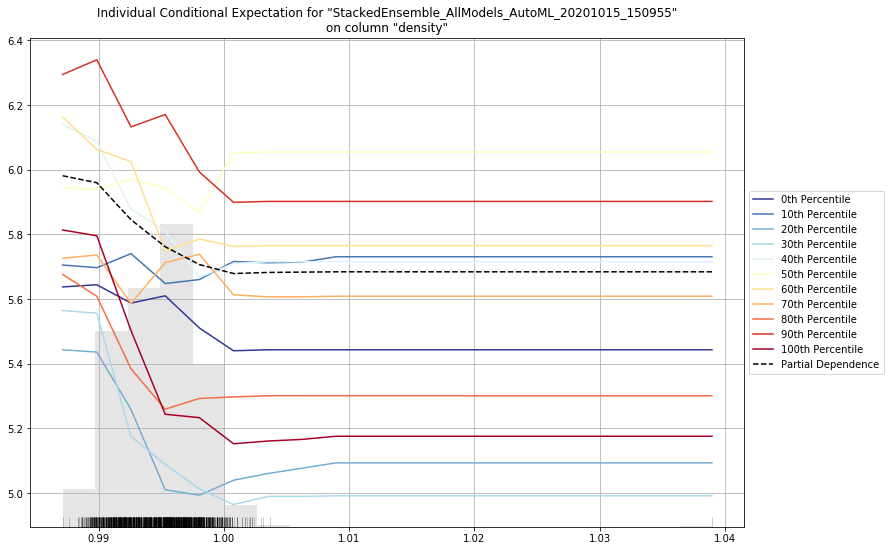

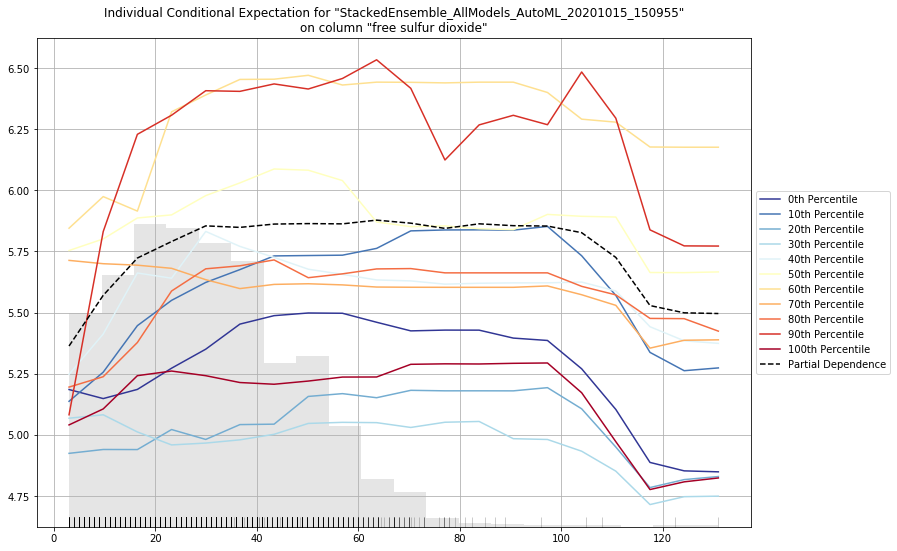

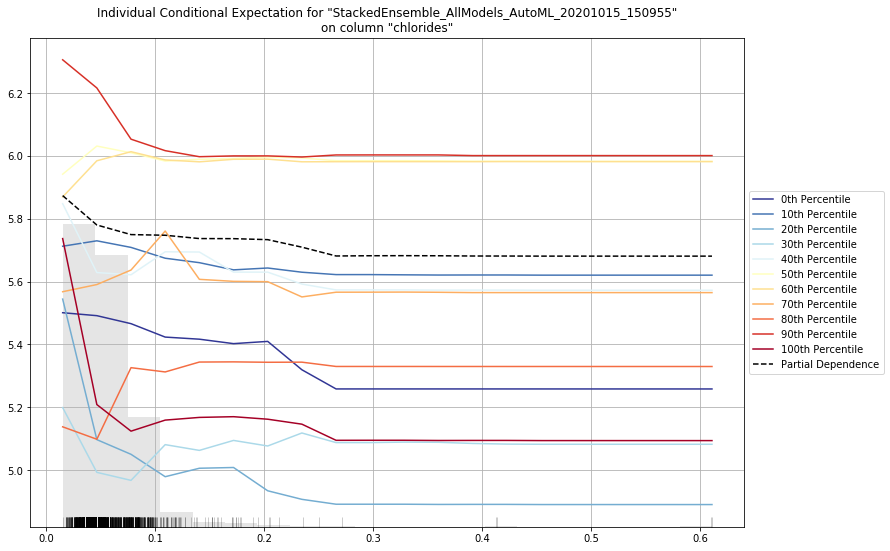

In [6]:
aml.explain(test);

## Local Explanation

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mean_residual_deviance rmse mse mae rmsle training_time_ms predict_time_per_row_ms predict 
 
 
 StackedEnsemble_AllModels_AutoML_20201015_150955 0.374866 0.612263 0.374866 0.430019 0.0929193 378 0.024668 5.78654 
 StackedEnsemble_BestOfFamily_AutoML_20201015_150955 0.377752 0.614616 0.377752 0.434258 0.093245 164 0.011682 5.76567 
 XRT_1_AutoML_20201015_150955 0.384959 0.62045 0.384959 0.44955 0.0942558 702 0.003335 5.75815 
 DRF_1_AutoML_20201015_150955 0.387688 0.622646 0.387688 0.451327 0.0946572 479 0.003064 5.82689 
 GBM_grid__1_AutoML_20201015_150955_model_62 0.397921 0.63081 0.397921 0.423871 0.0957819 1726 0.003082 5.95924 
 GBM_grid__1_AutoML_20201015_150955_model_47 0.399524 0.632079 0.399524 0.435952 0.0958916 728 0.002905 5.94553 
 GBM_grid__1_AutoML_20201015_150955_model_22 0.400356 0.632737 0.400356 0.42541 0.0959897 1183 0.002627 5.98826 
 GBM_grid__1_AutoML_20201015_150955_model_61 0.402673 0.634565 0.402673 0.433498 0.0965175 817 0.003155 5.98262 
 GBM_grid__1_AutoML_20201015_150955_model_78 0.405598 0.636866 0.405598 0.463236 0.0964935 513 0.00363 6.0643 
 GBM_grid__1_AutoML_20201015_150955_model_56 0.405722 0.636963 0.405722 0.46403 0.09647 627 0.003939 5.9114

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

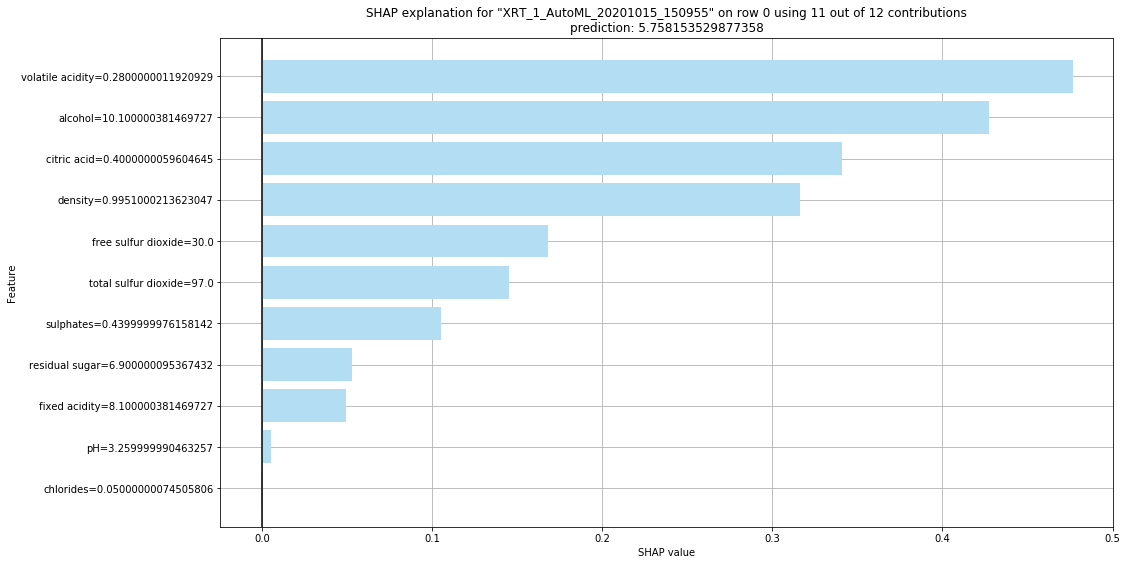

In [7]:
aml.explain_row(test, 0);

----
# Explain the leader model
## Global Explanation

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

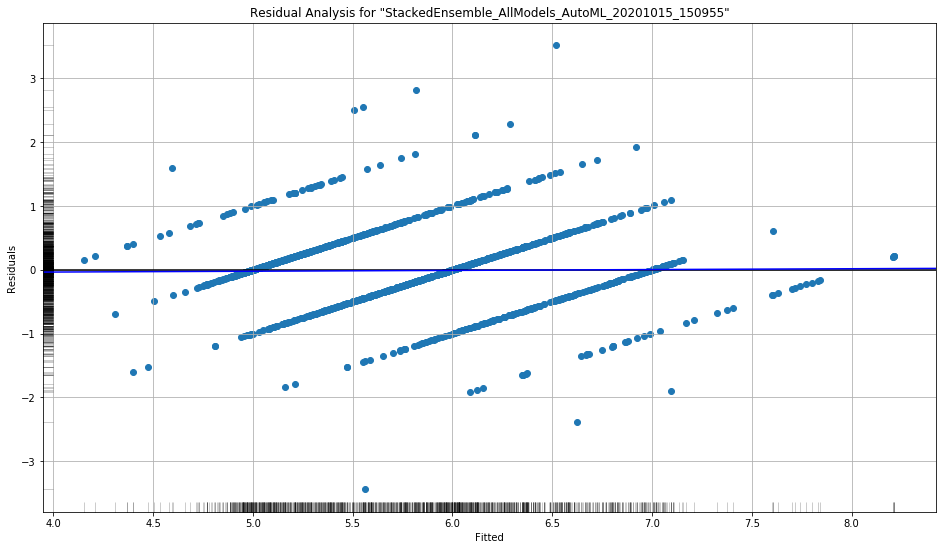

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

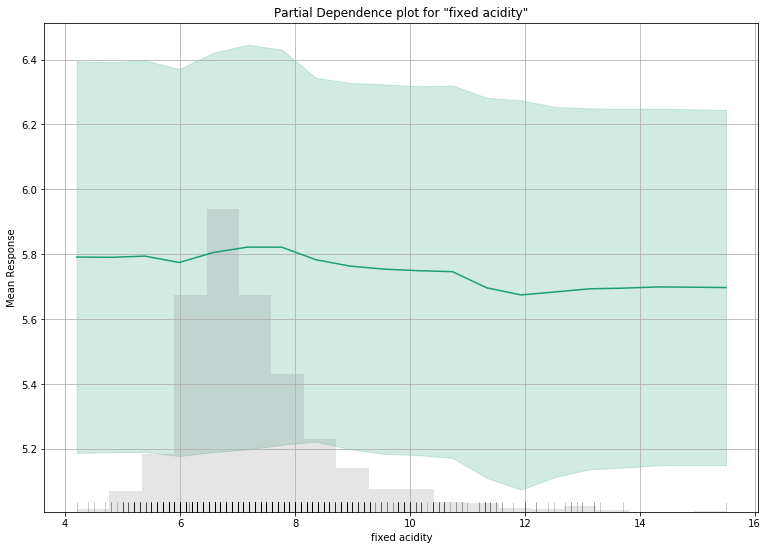

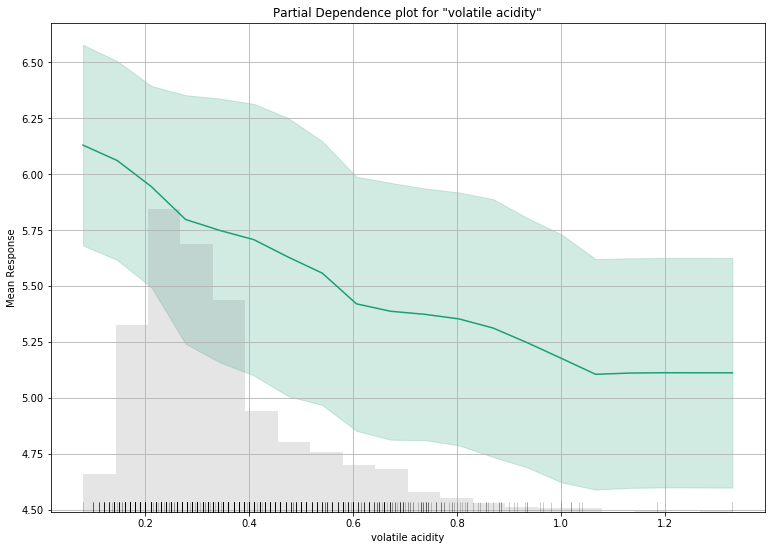

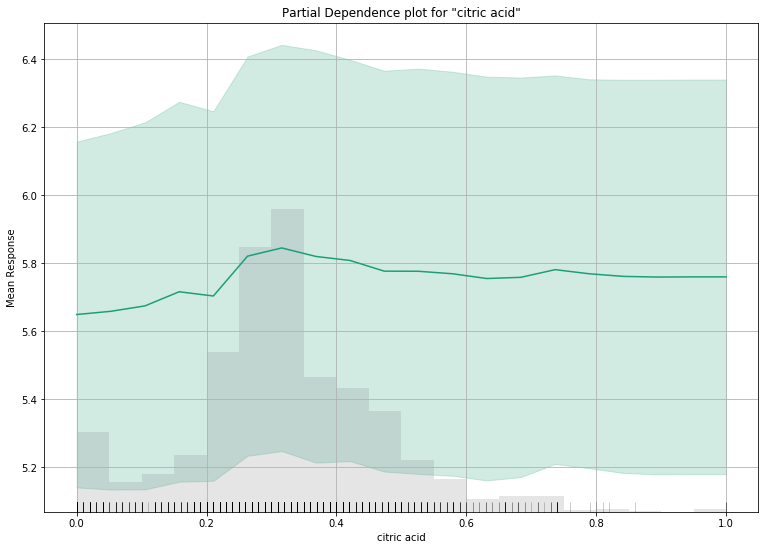

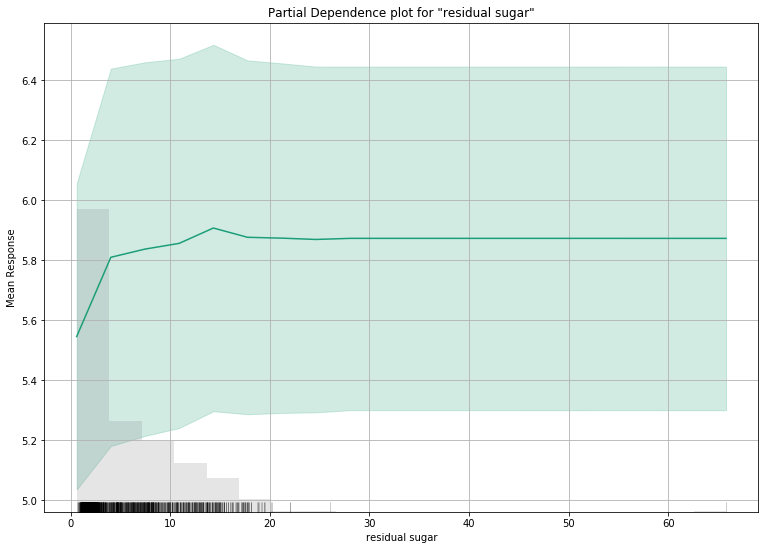

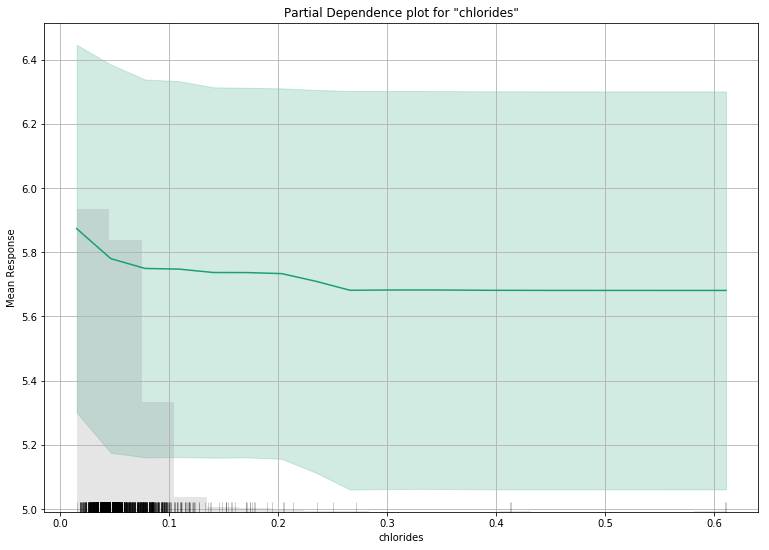

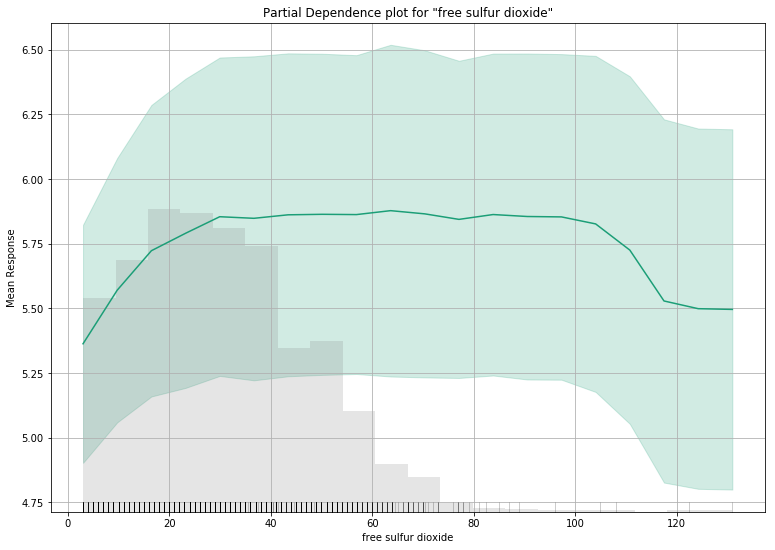

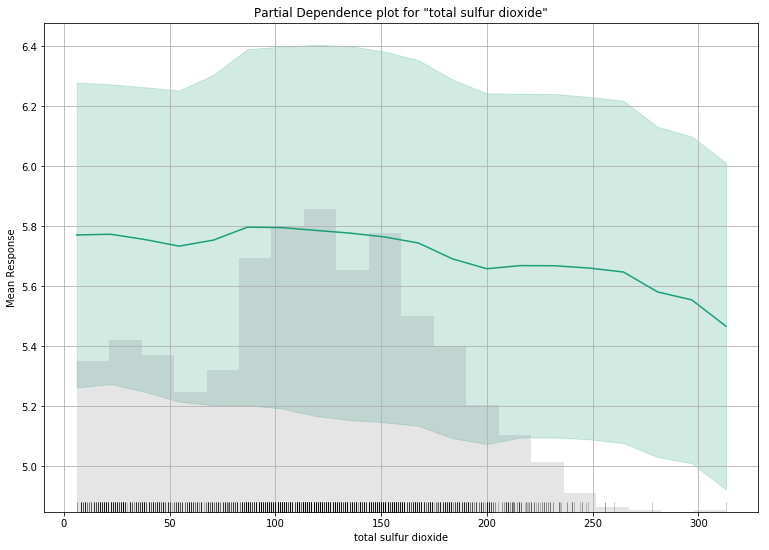

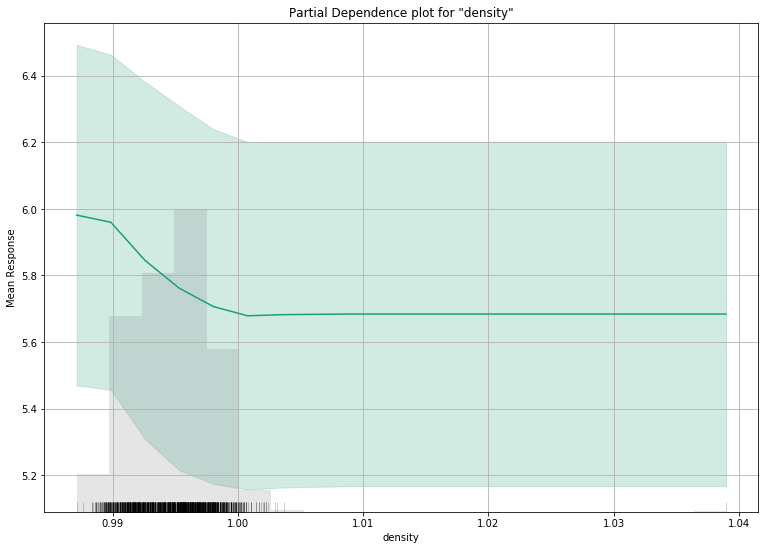

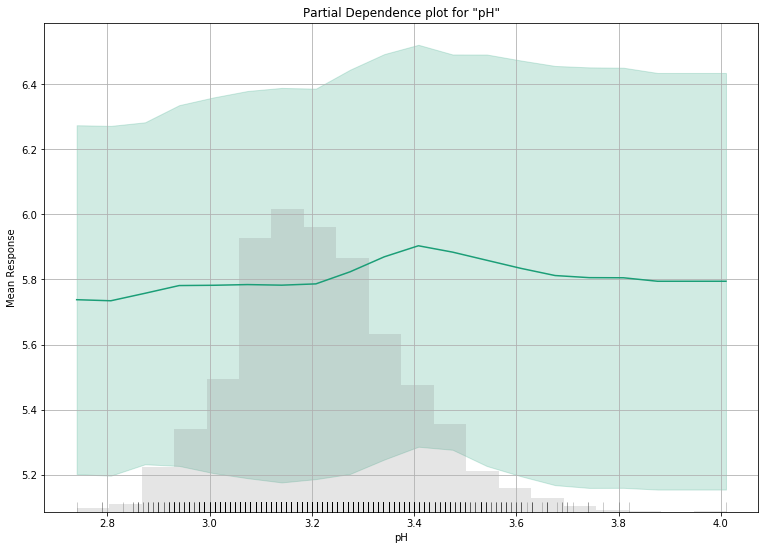

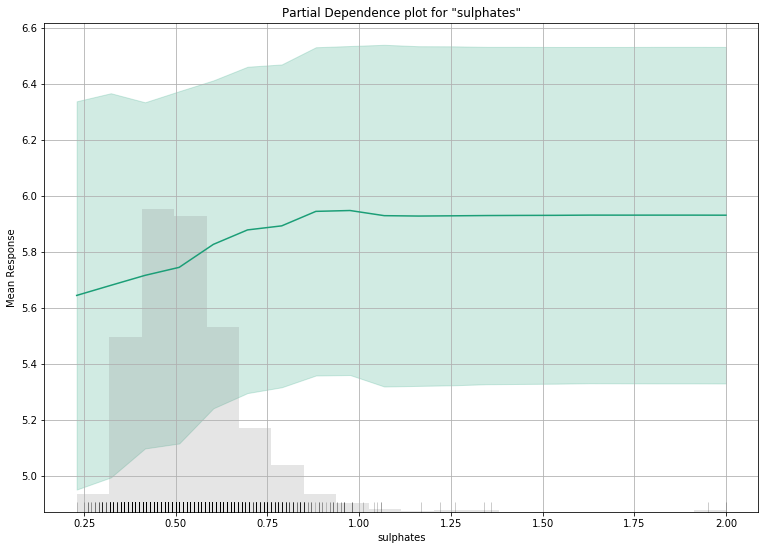

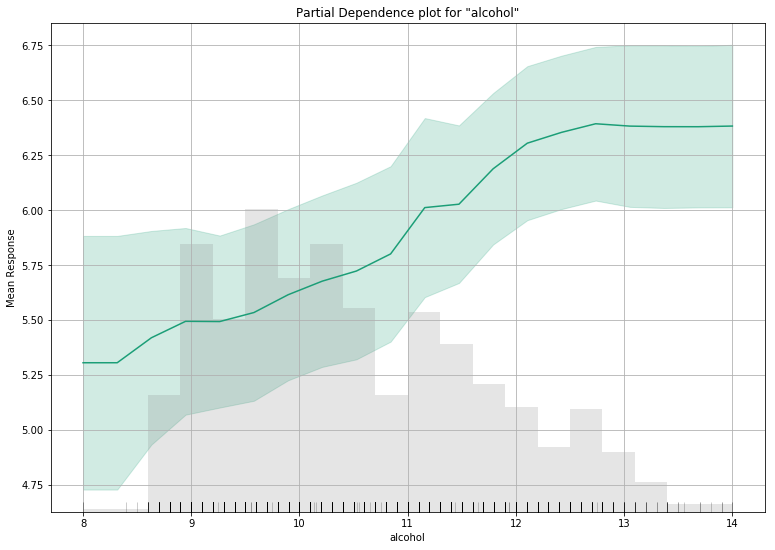

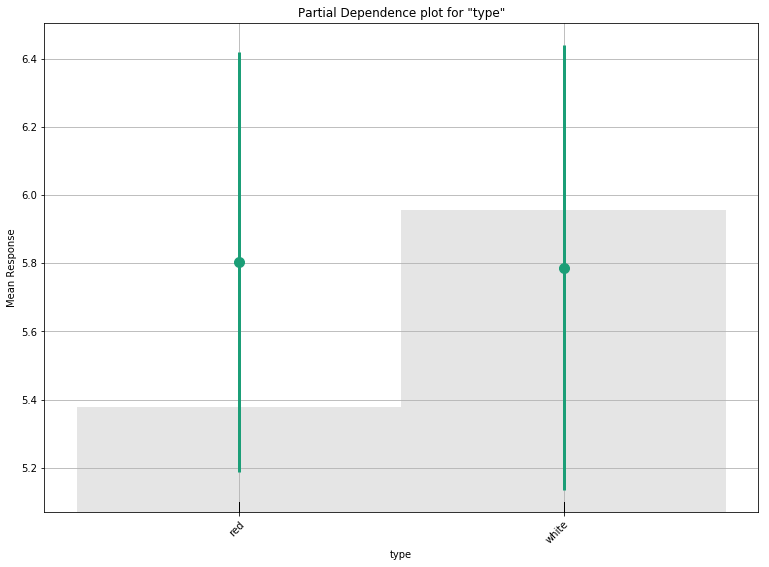

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

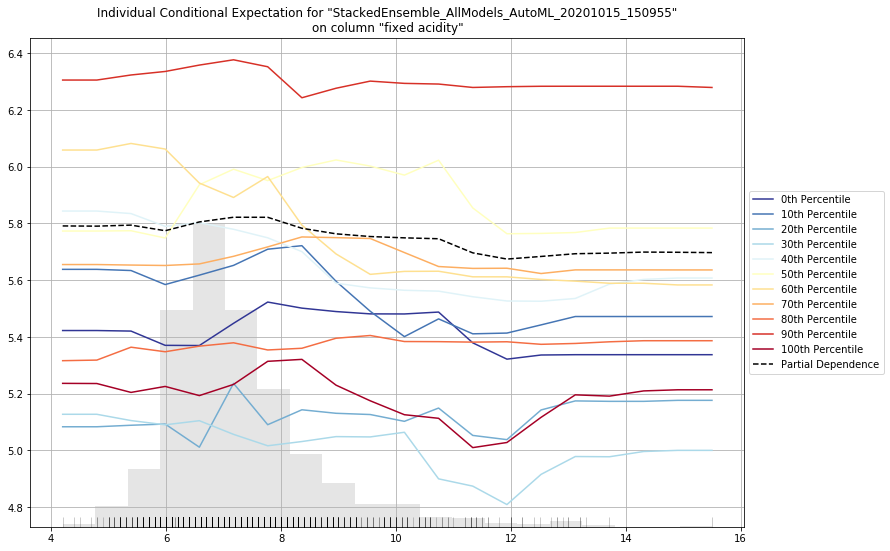

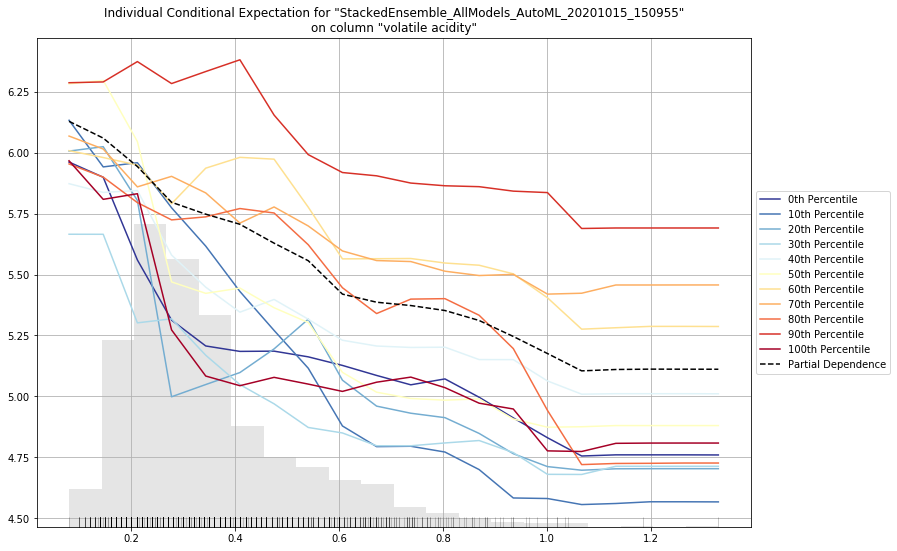

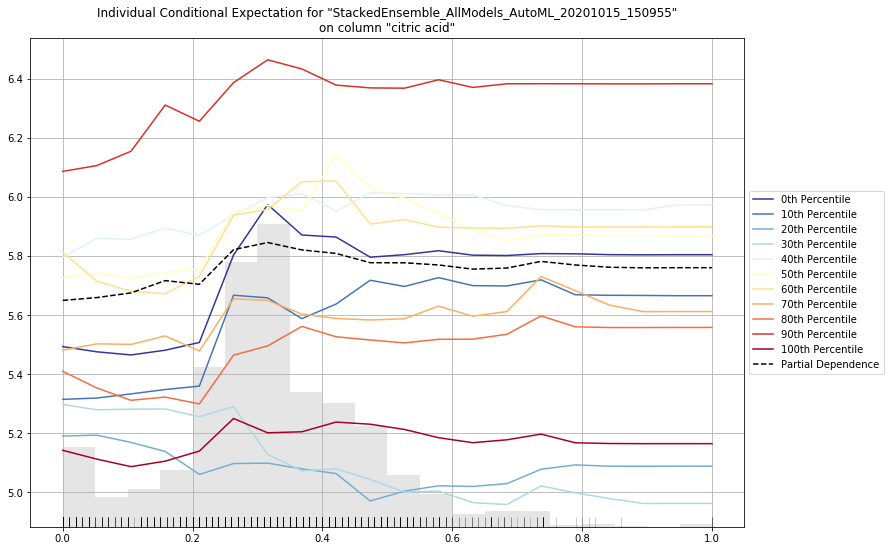

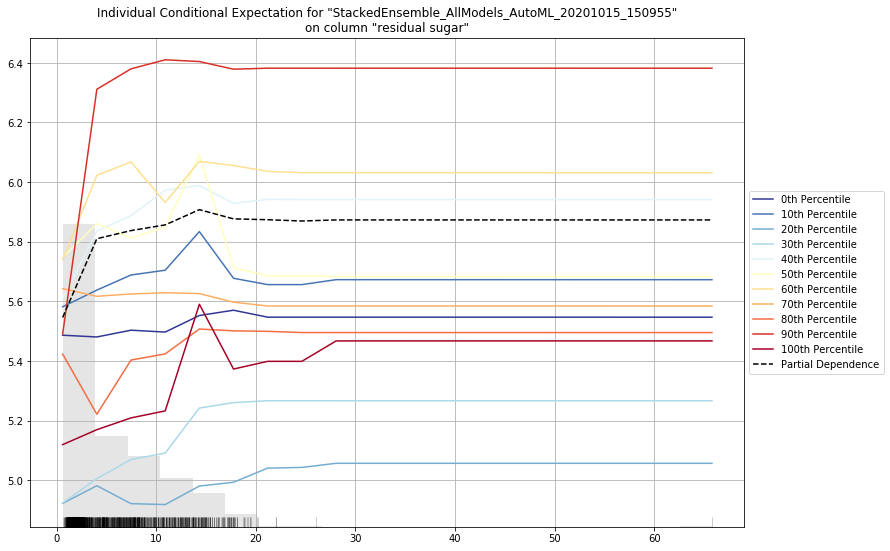

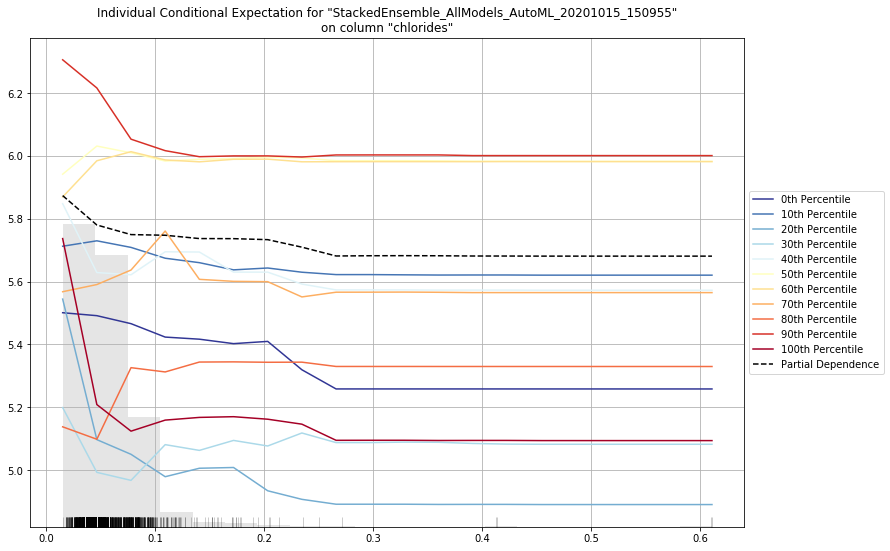

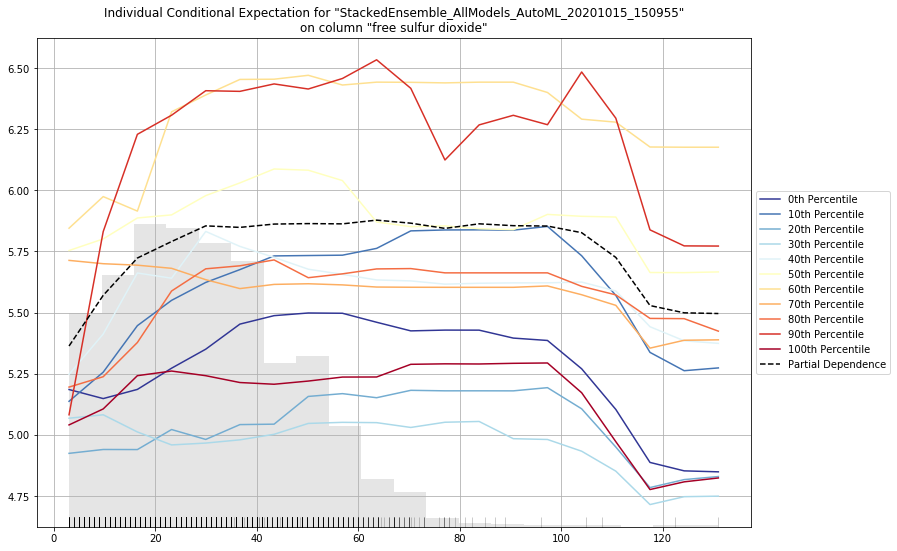

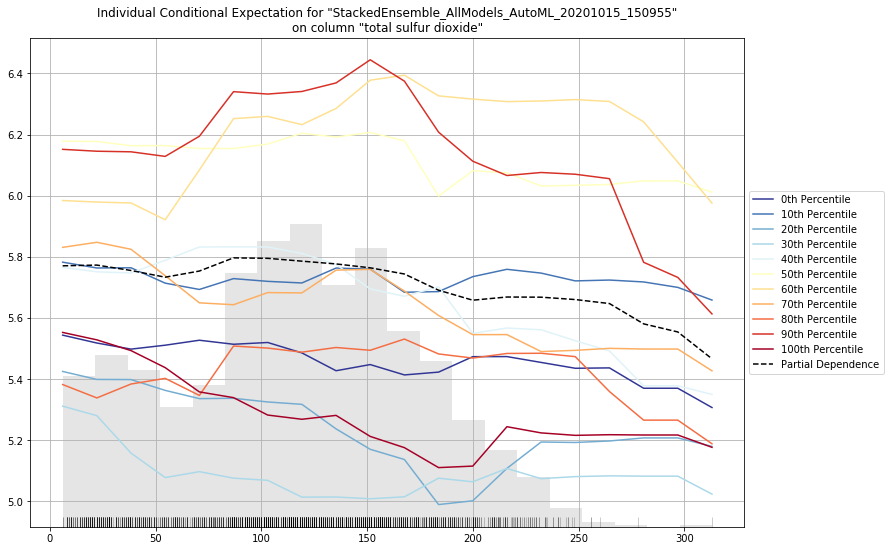

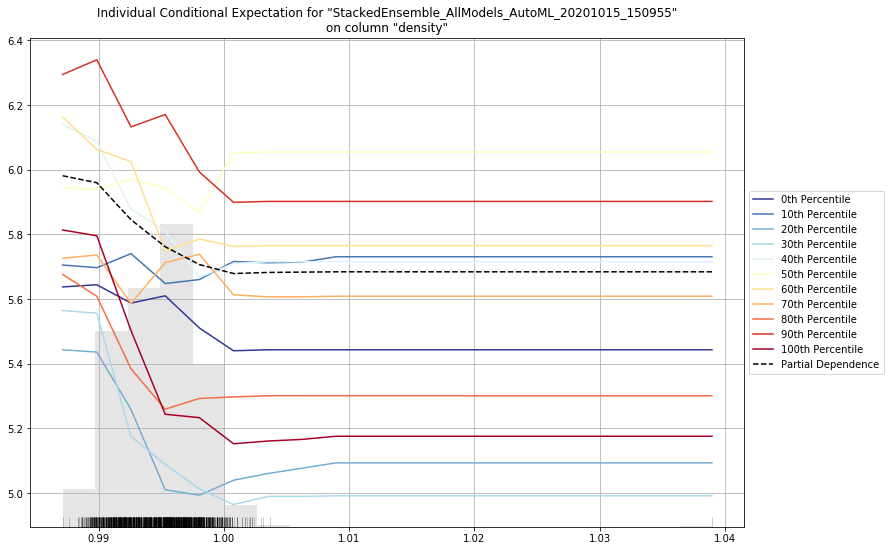

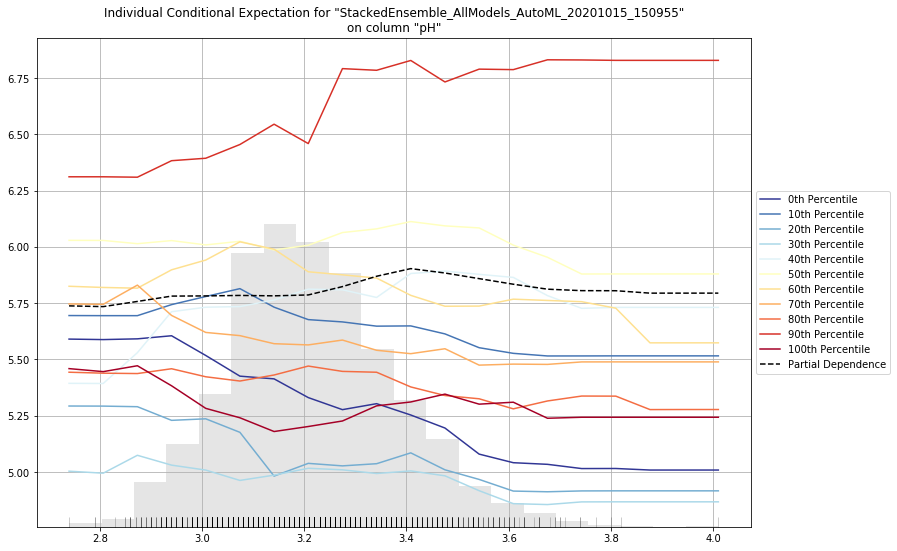

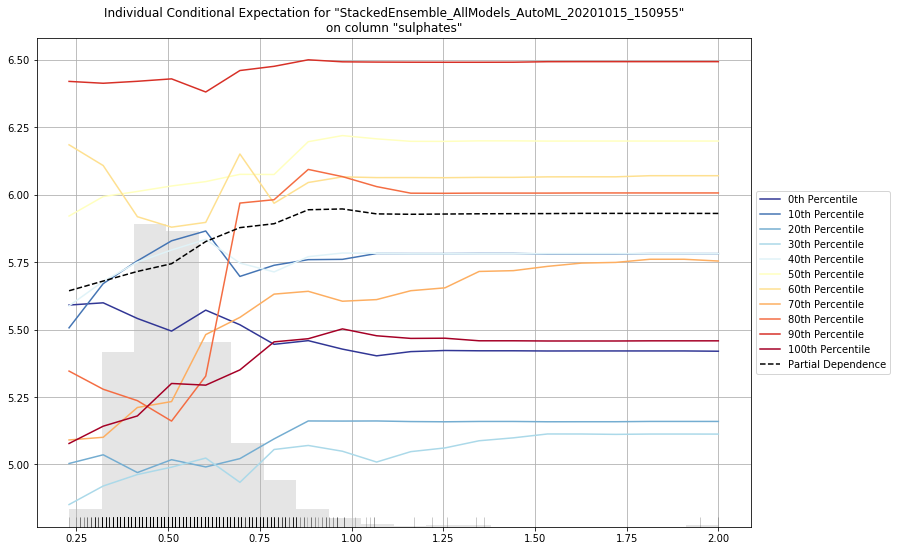

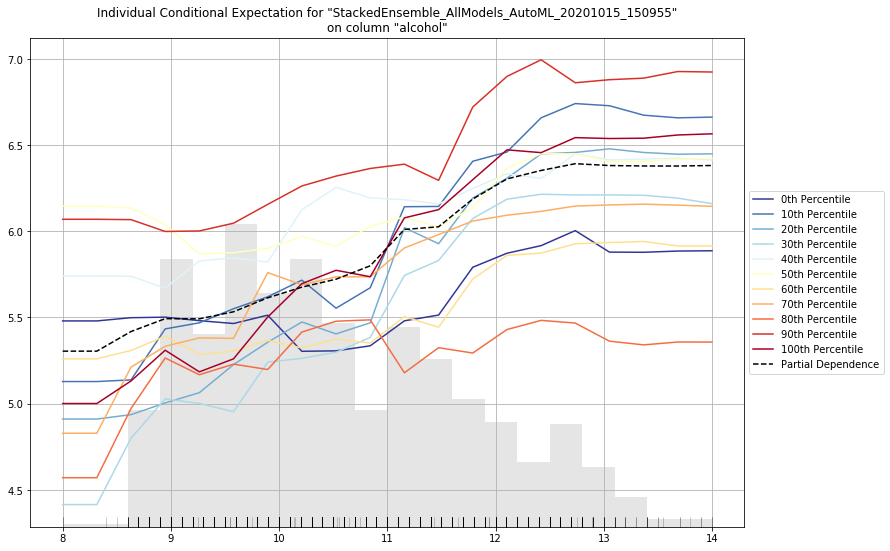

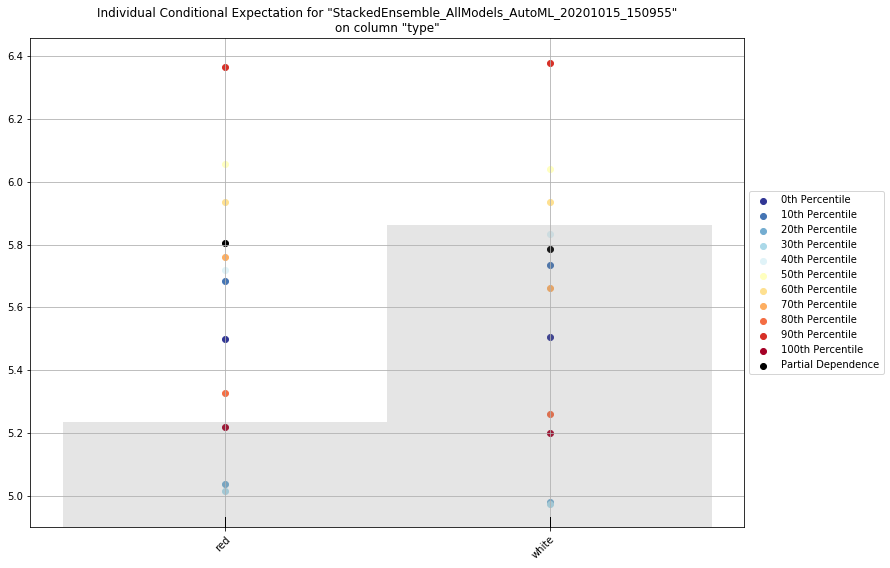

In [8]:
aml.leader.explain(test);

## Local Explanation

/Users/tomasfryda/.pyenv/versions/3.5.9/lib/python3.5/site-packages/h2o/explanation/_explain.py:2244: UserWarning: No model with variable importance. Selecting all features to explain.
  warnings.warn("No model with variable importance. Selecting all features to explain.")


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

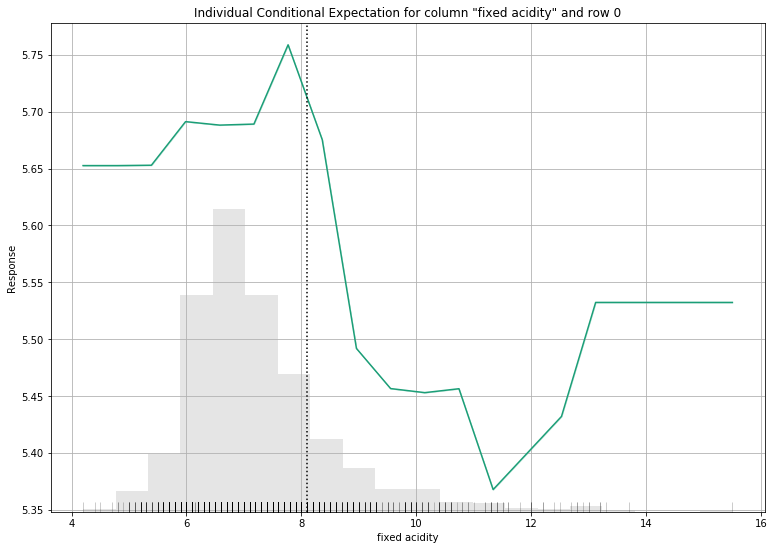

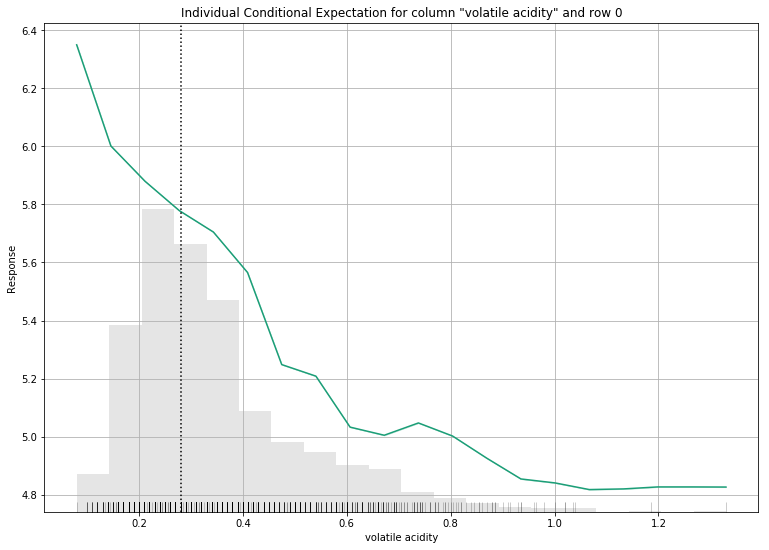

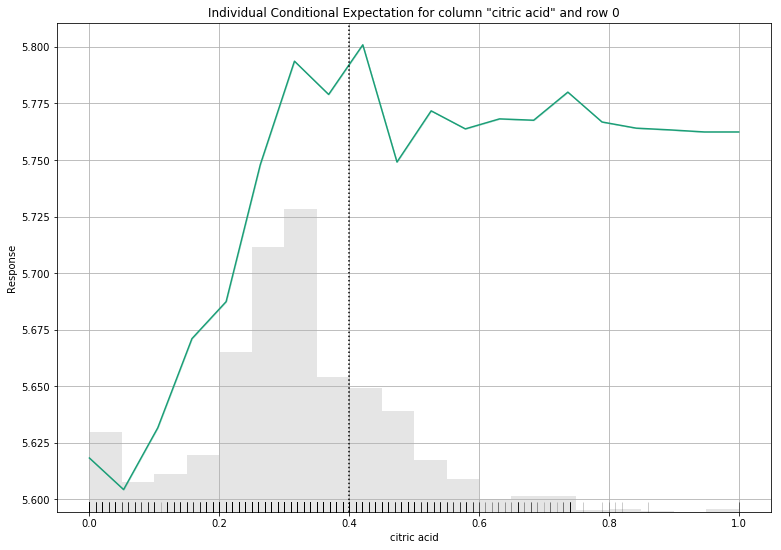

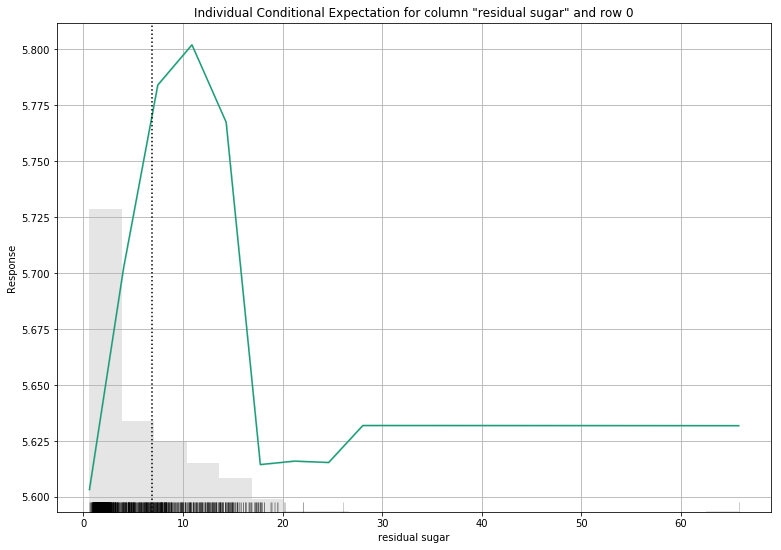

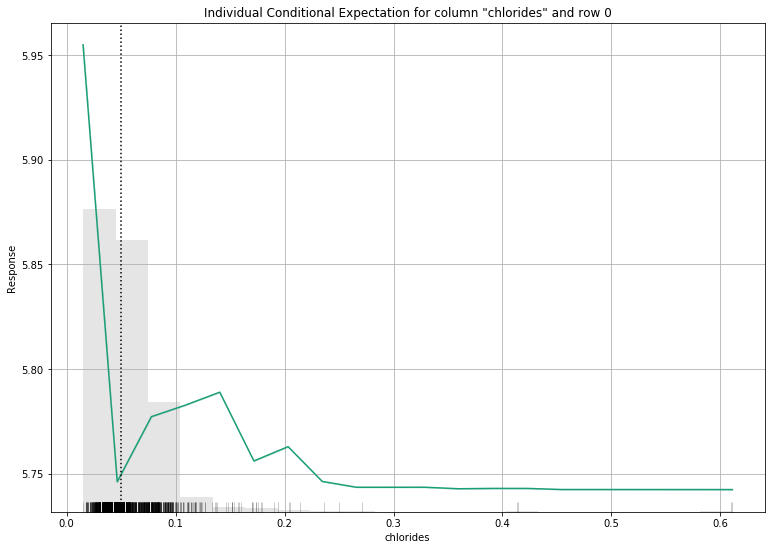

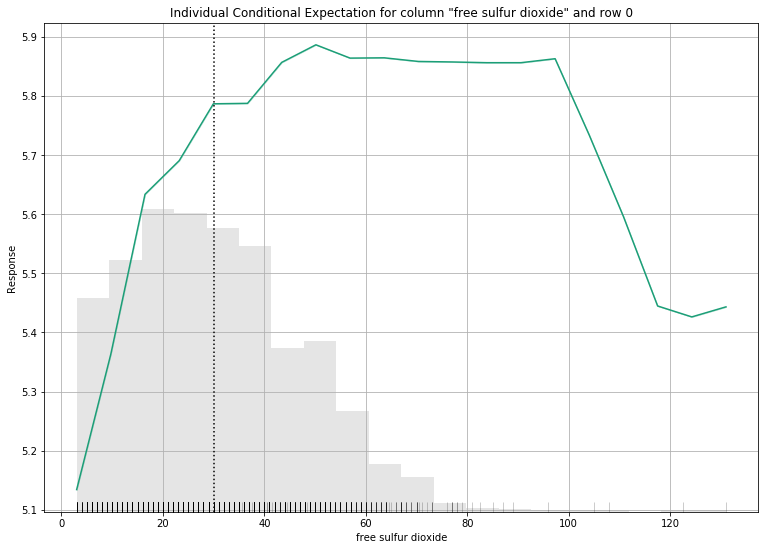

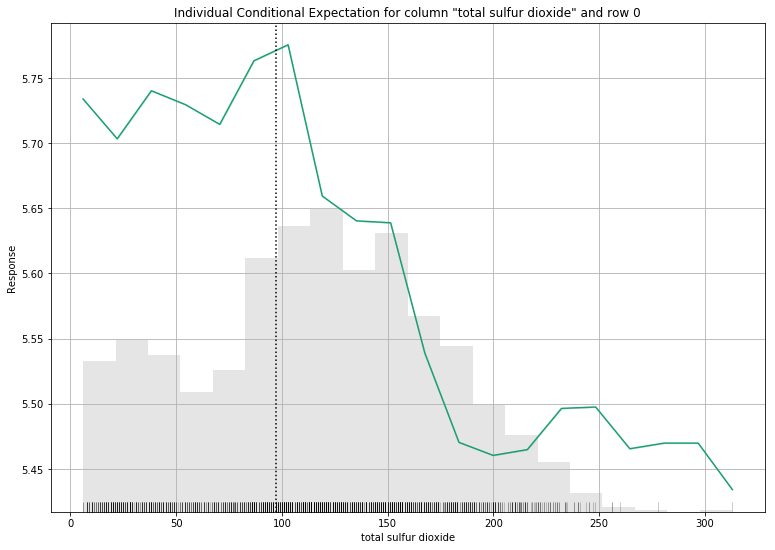

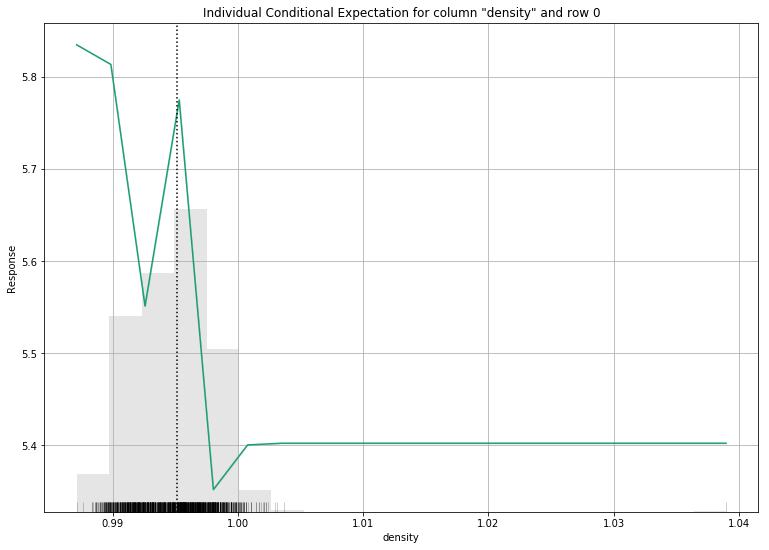

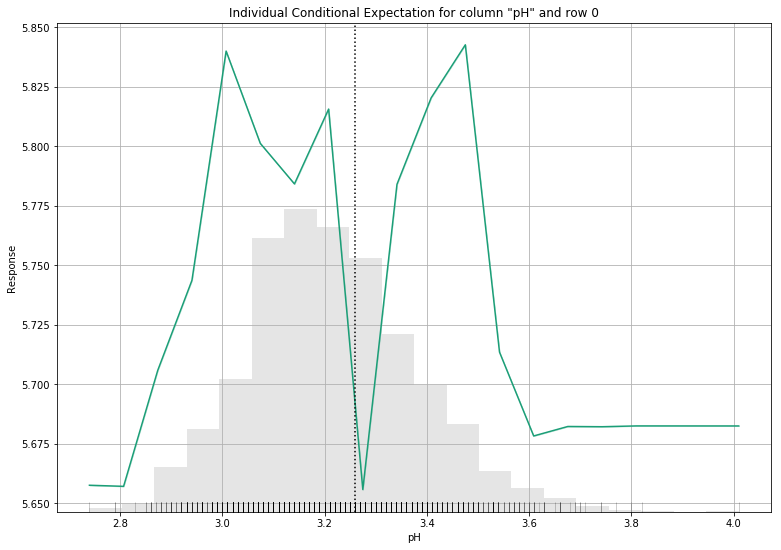

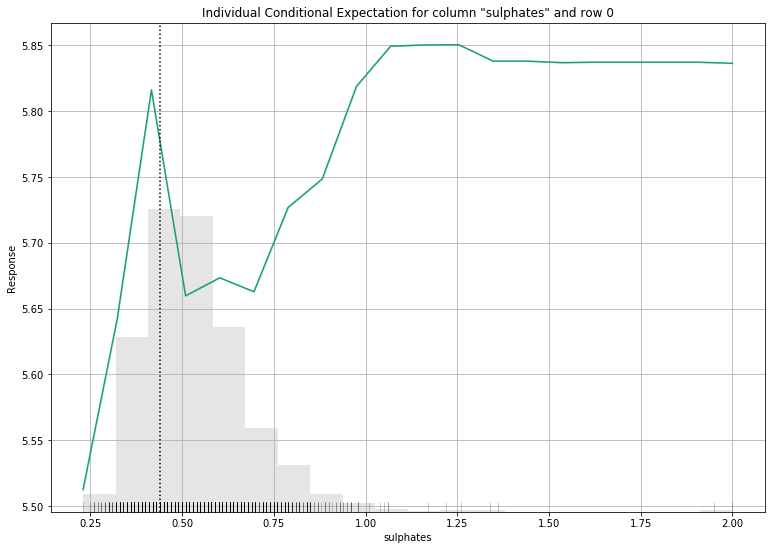

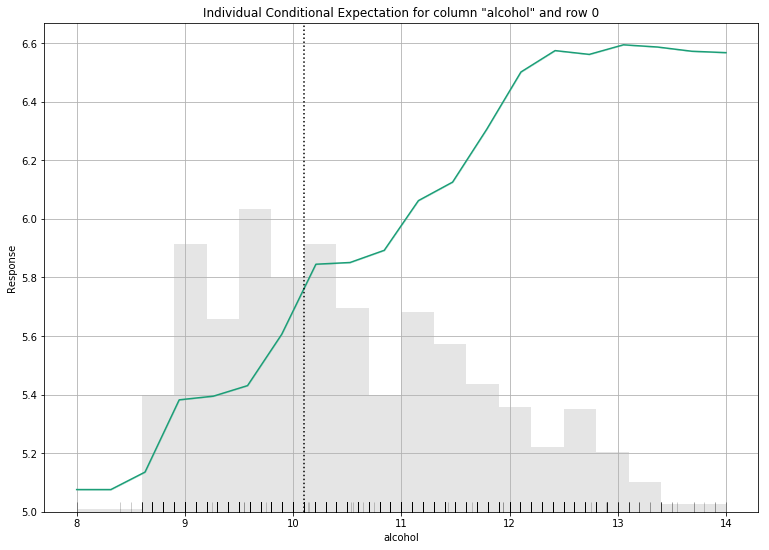

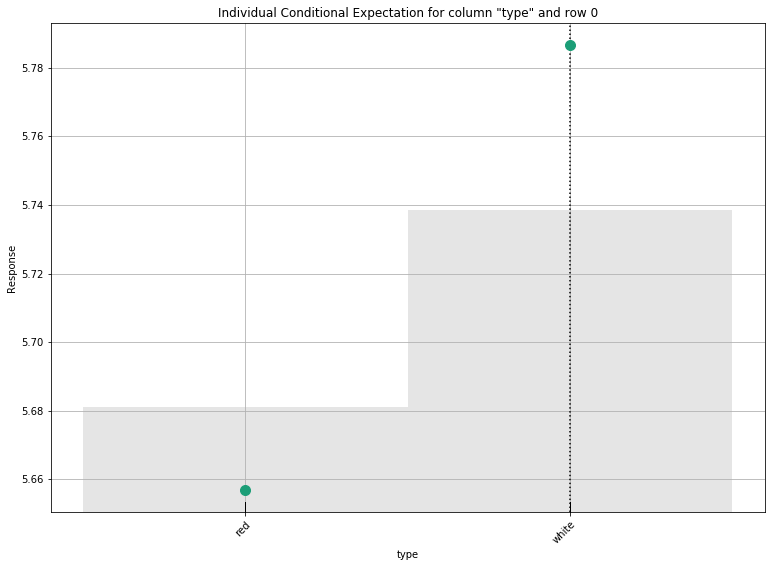

In [9]:
aml.leader.explain_row(test, 0);

----
# Explain a list of models

In [10]:
# Get first five base models (i.e., not stacked ensembles)
models = [m[0] for m in
              aml.leaderboard["model_id"].as_data_frame(use_pandas=False, header=False)
         if not m[0].startswith("StackedEnsemble")]
models = [h2o.get_model(m) for m in models[:5]]

## Global Explanation

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mse rmse mae rmsle 
 
 
 XRT_1_AutoML_20201015_150955 0.353535 0.594588 0.433637 0.0892888 
 DRF_1_AutoML_20201015_150955 0.354127 0.595086 0.436 0.0894088 
 GBM_grid__1_AutoML_20201015_150955_model_22 0.355599 0.596321 0.399963 0.0898248 
 GBM_grid__1_AutoML_20201015_150955_model_47 0.359506 0.599588 0.418435 0.0899363 
 GBM_grid__1_AutoML_20201015_150955_model_62 0.367822 0.606484 0.4097 0.0913209

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

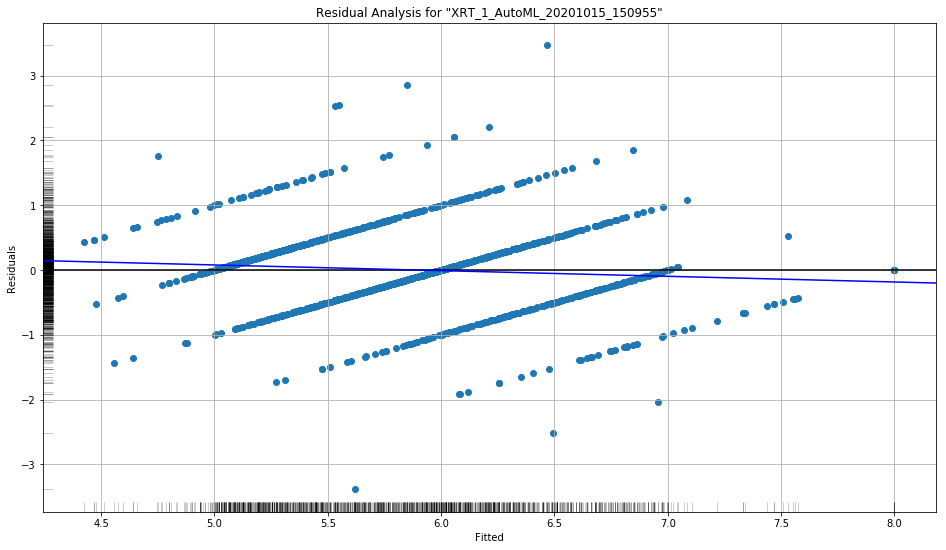

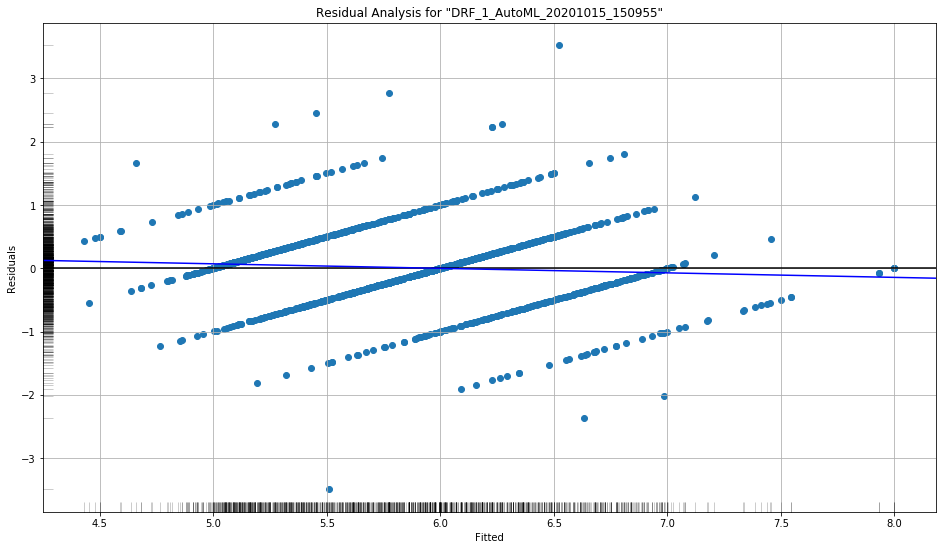

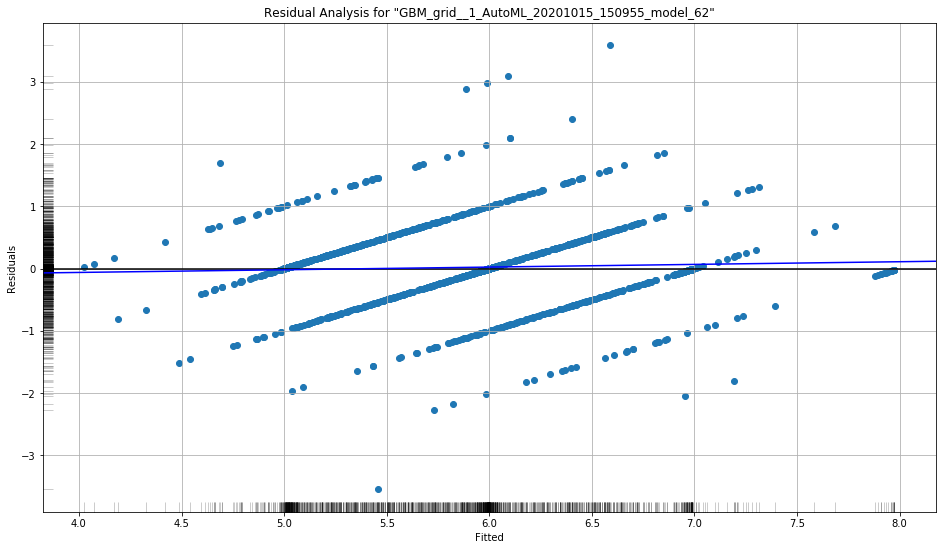

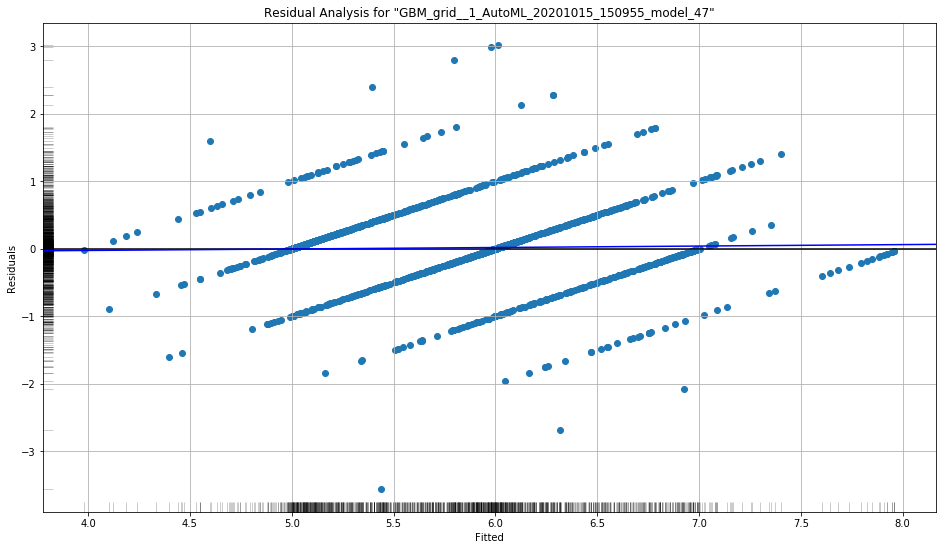

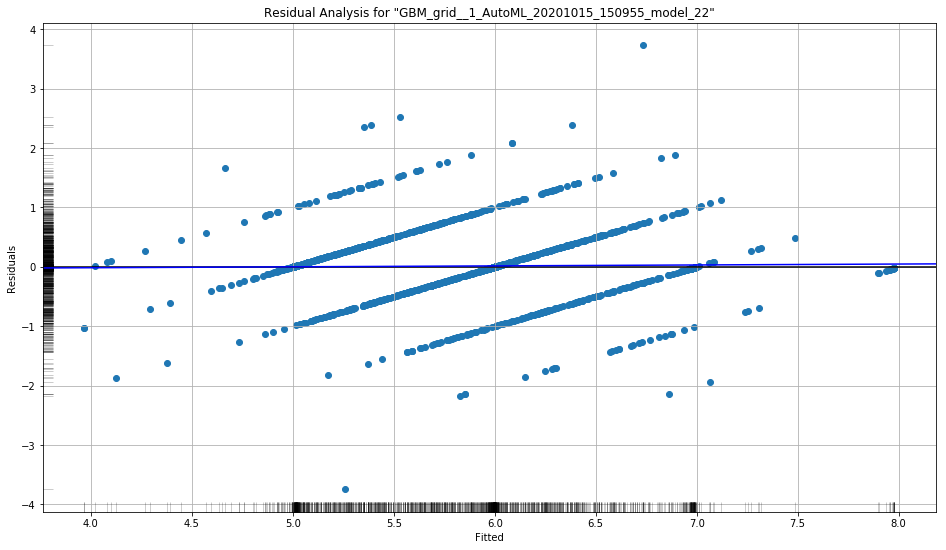

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

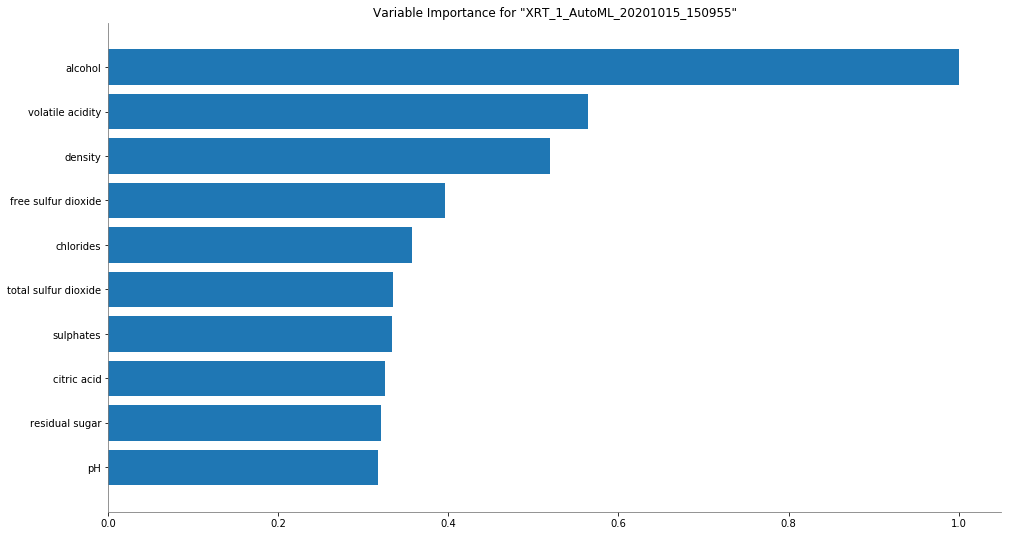

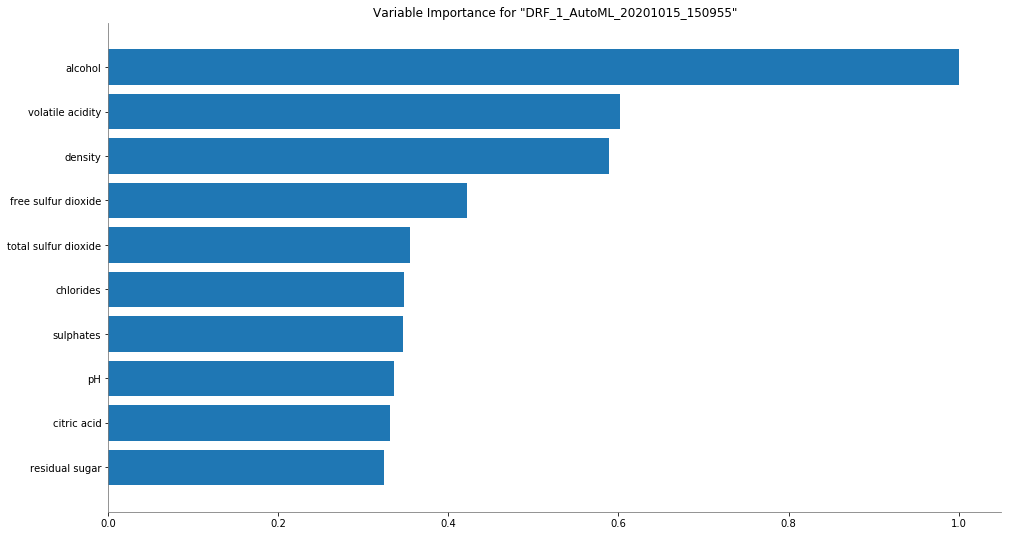

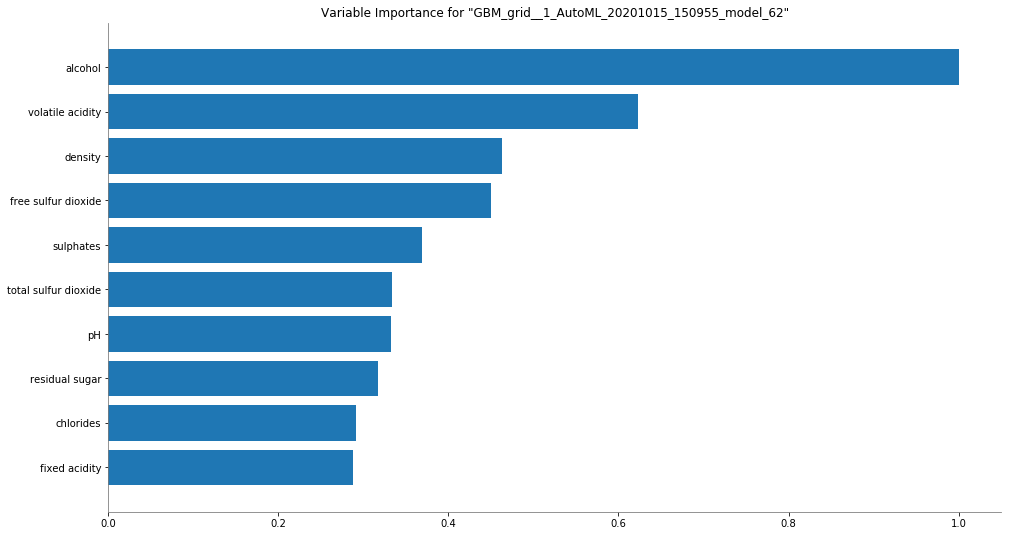

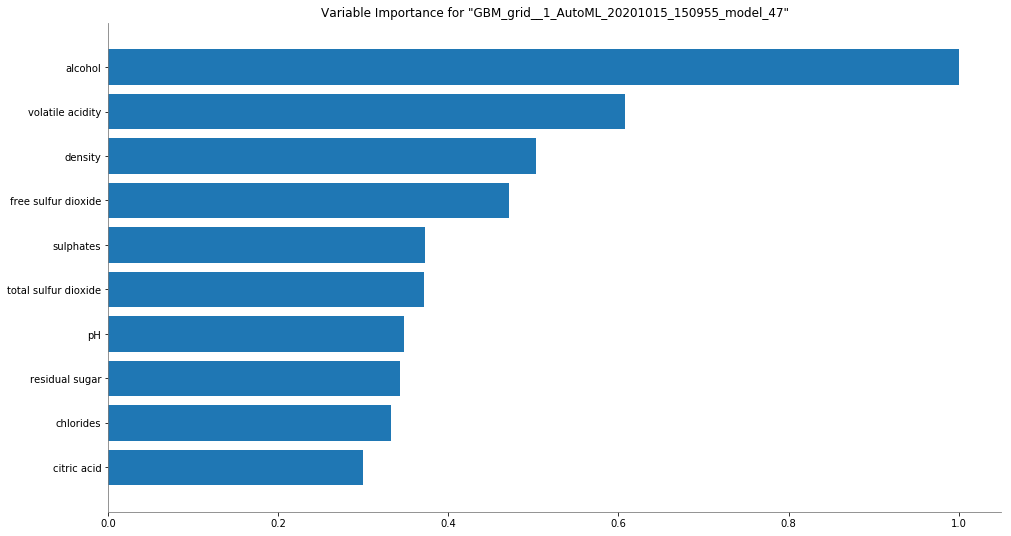

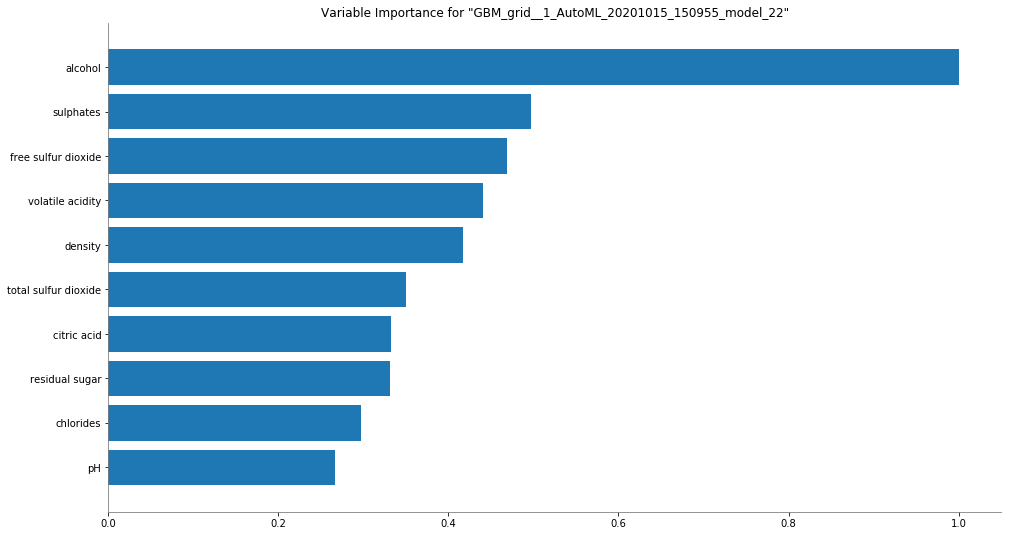

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

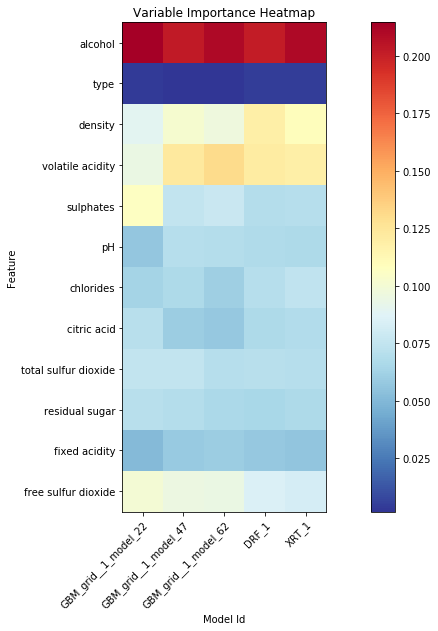

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

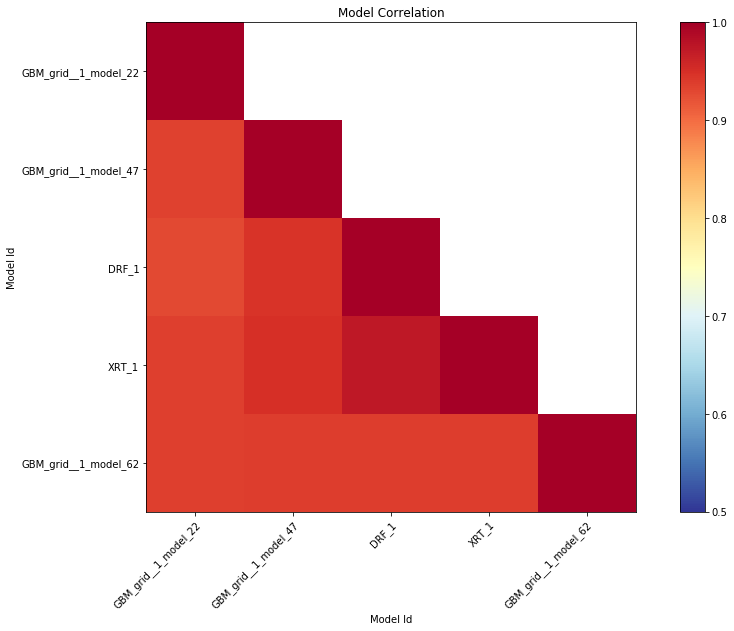

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

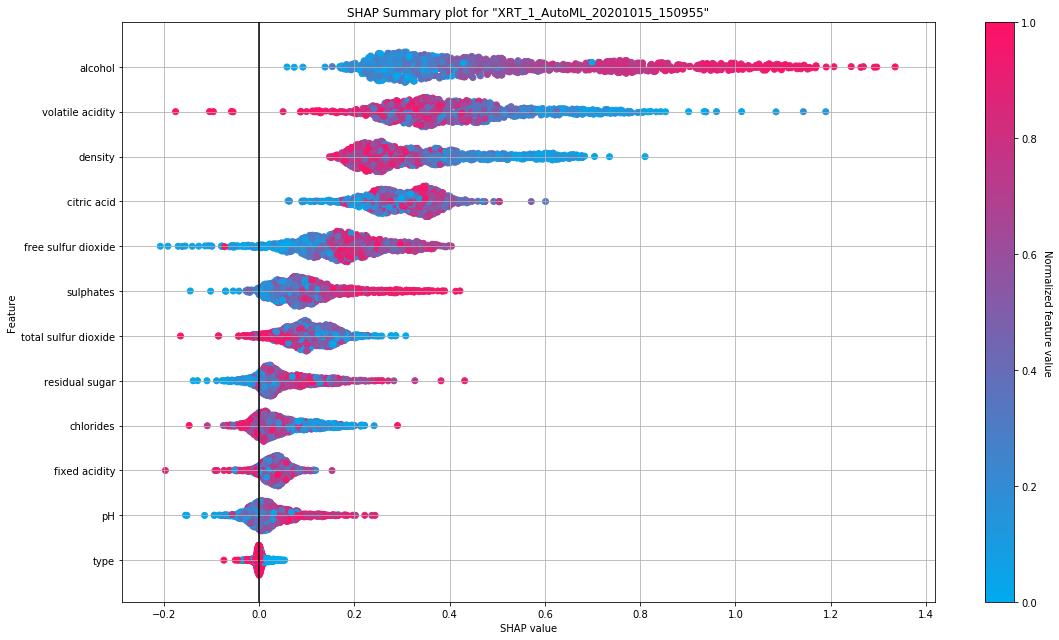

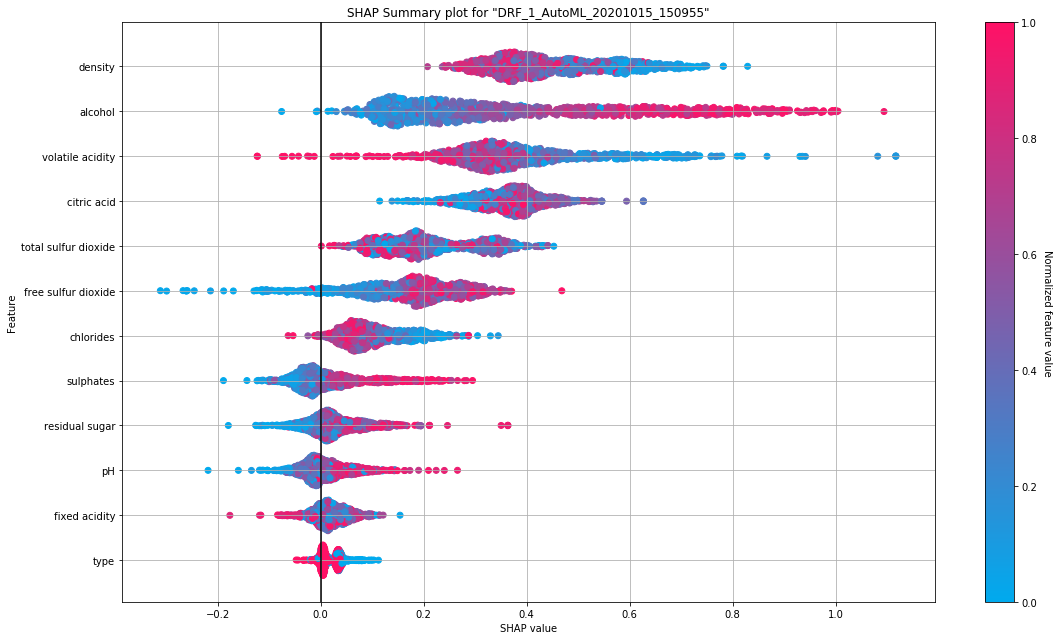

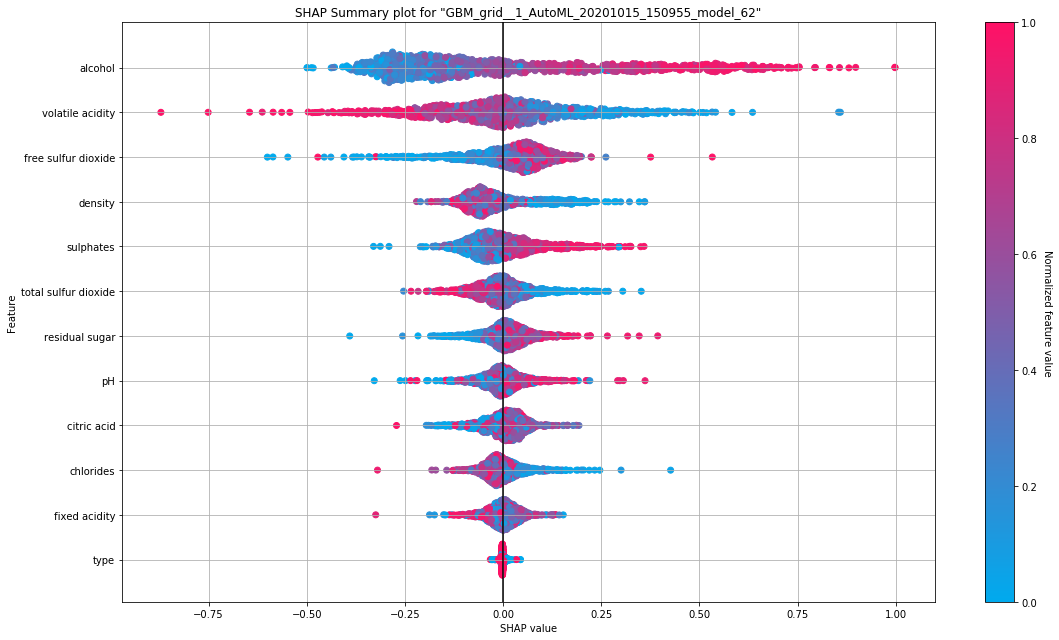

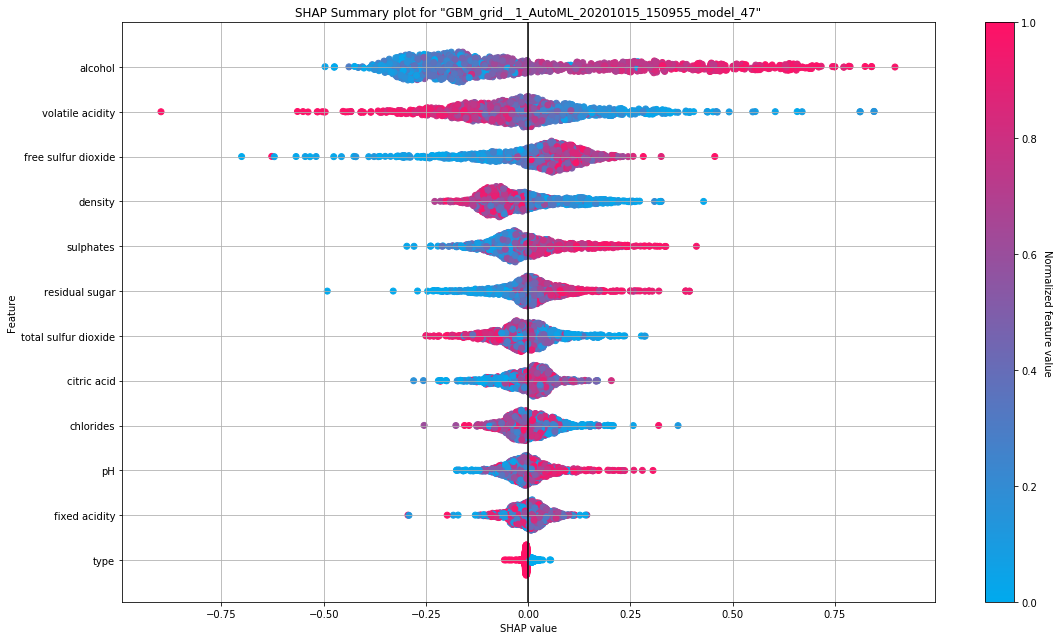

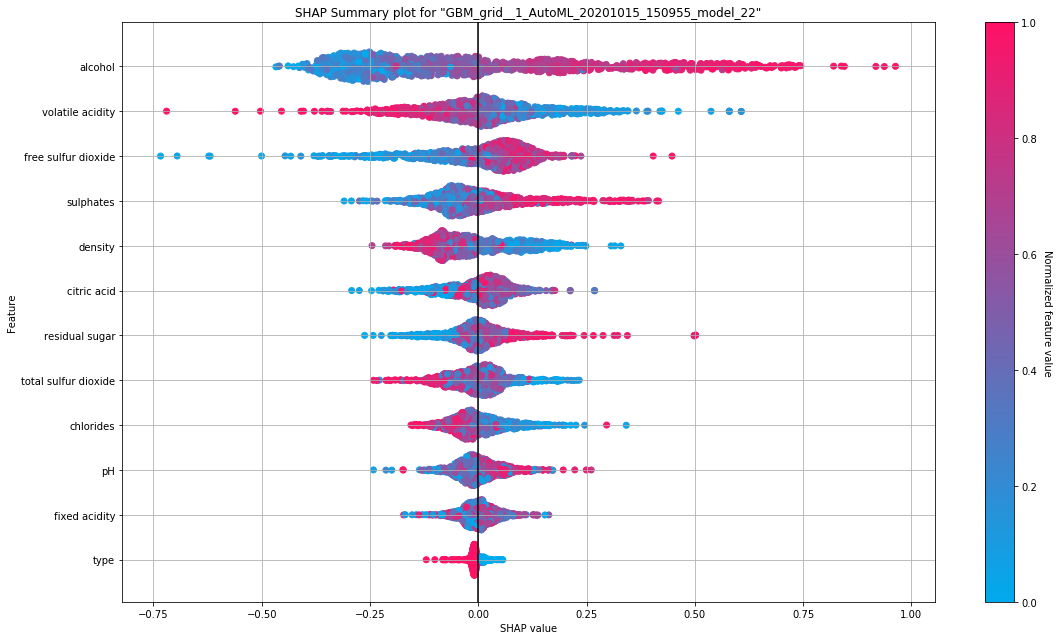

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

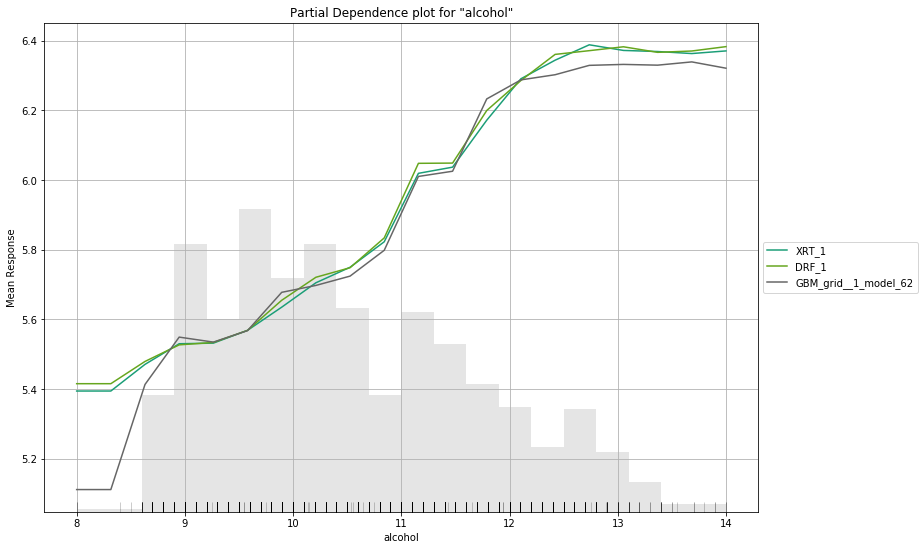

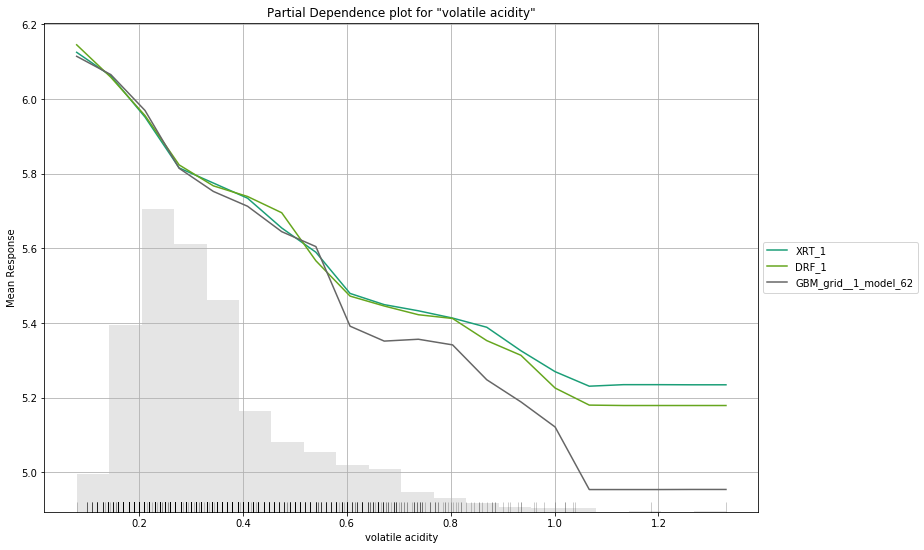

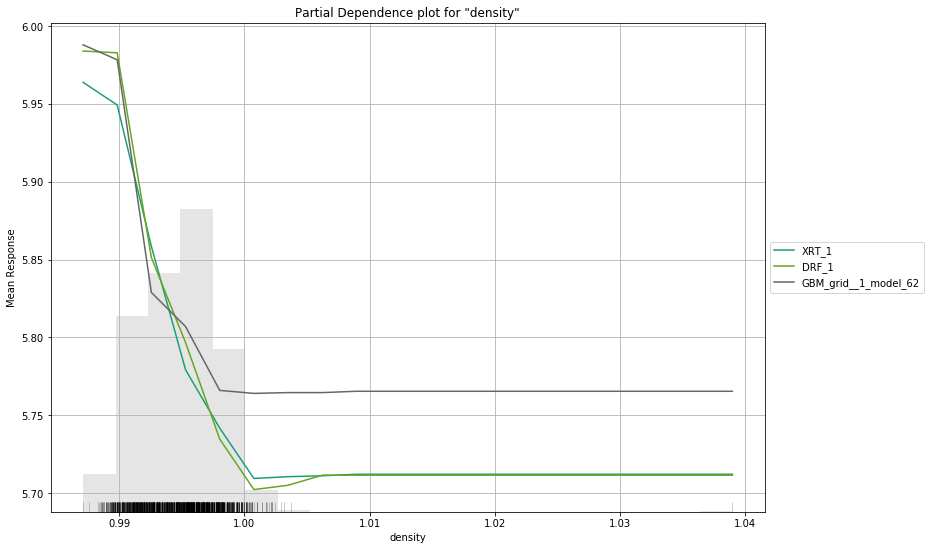

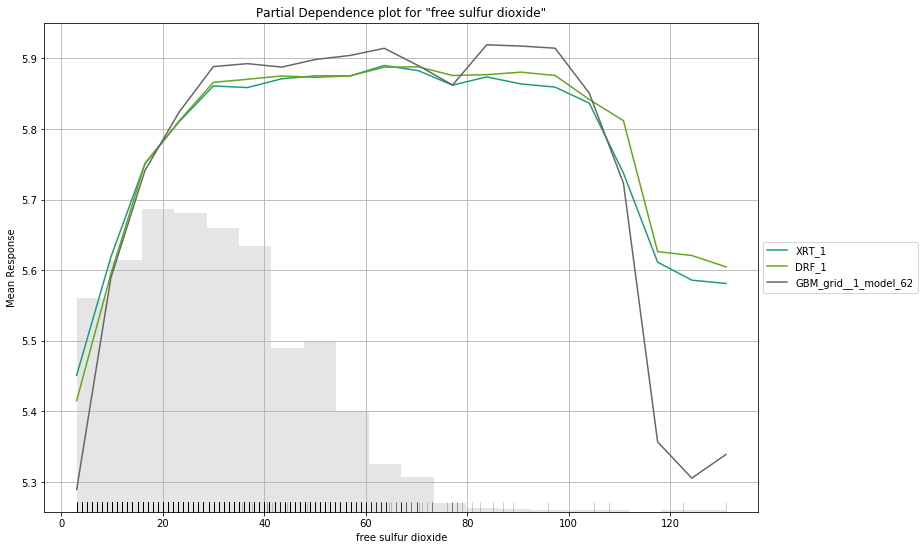

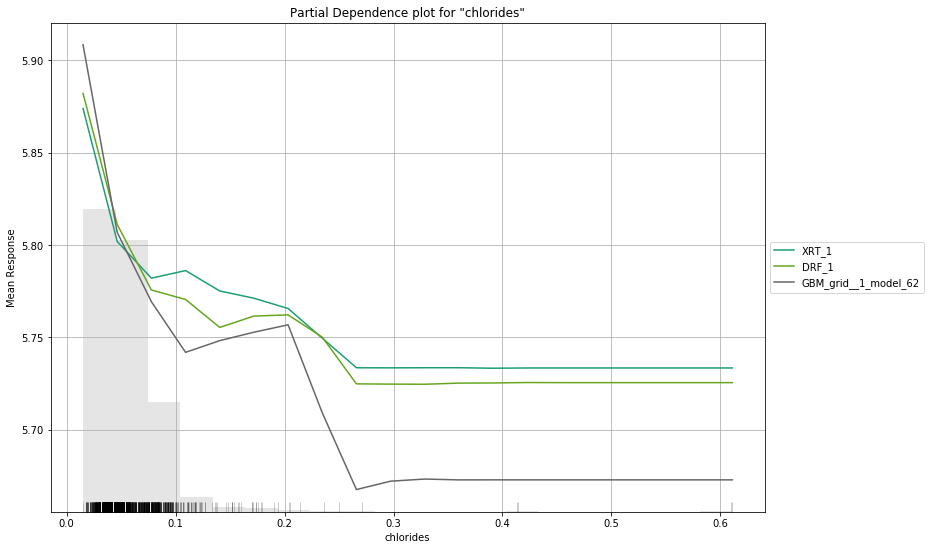

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

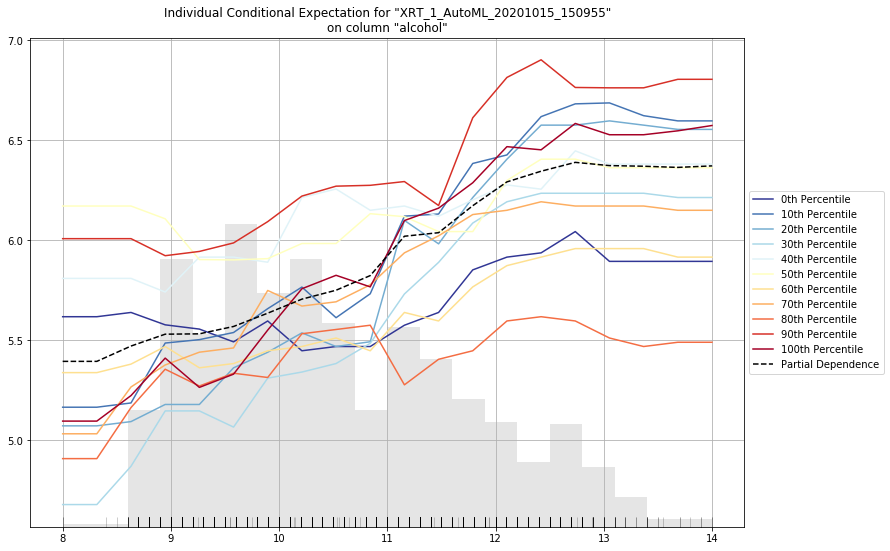

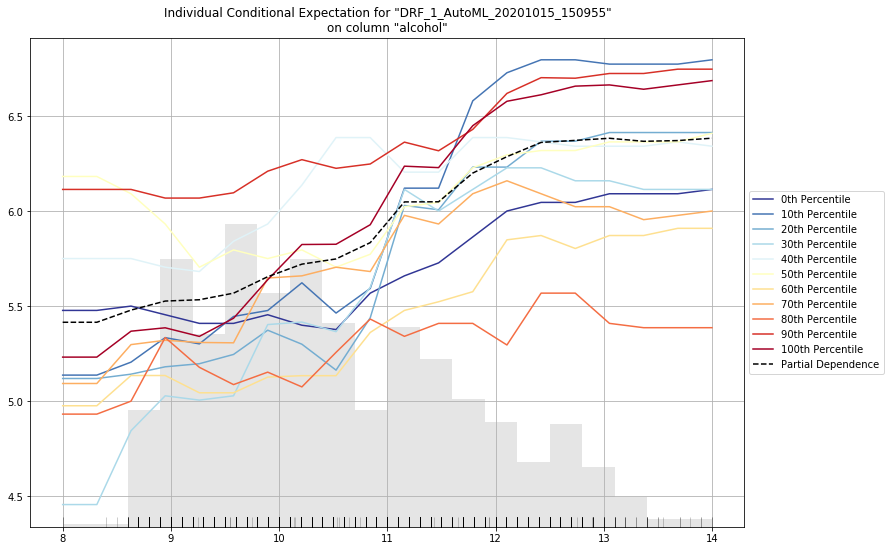

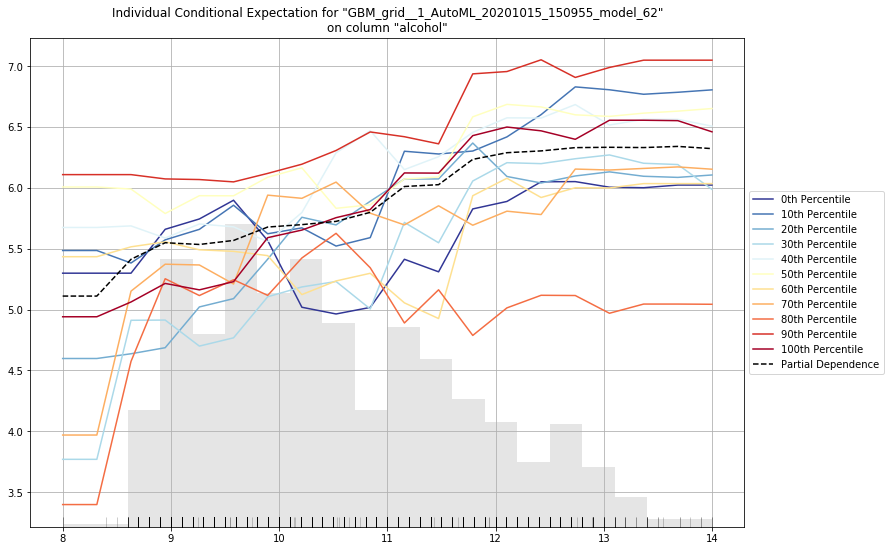

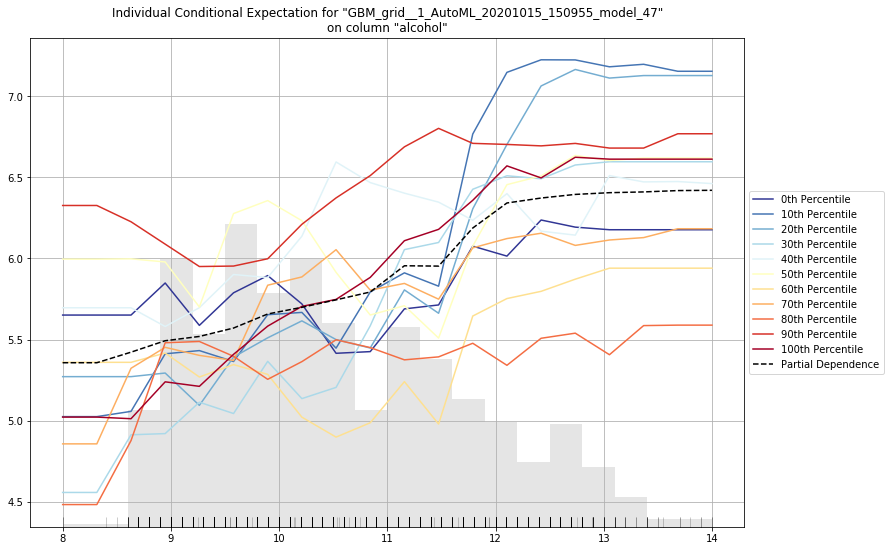

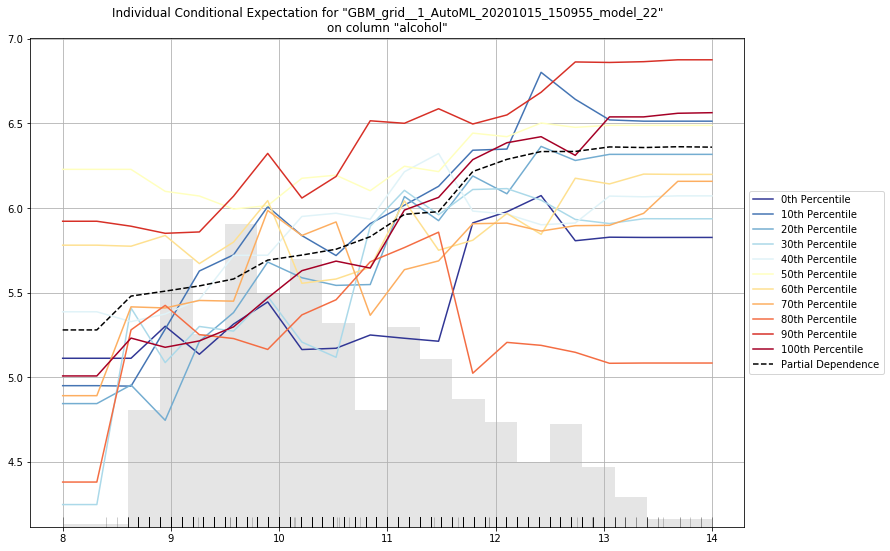

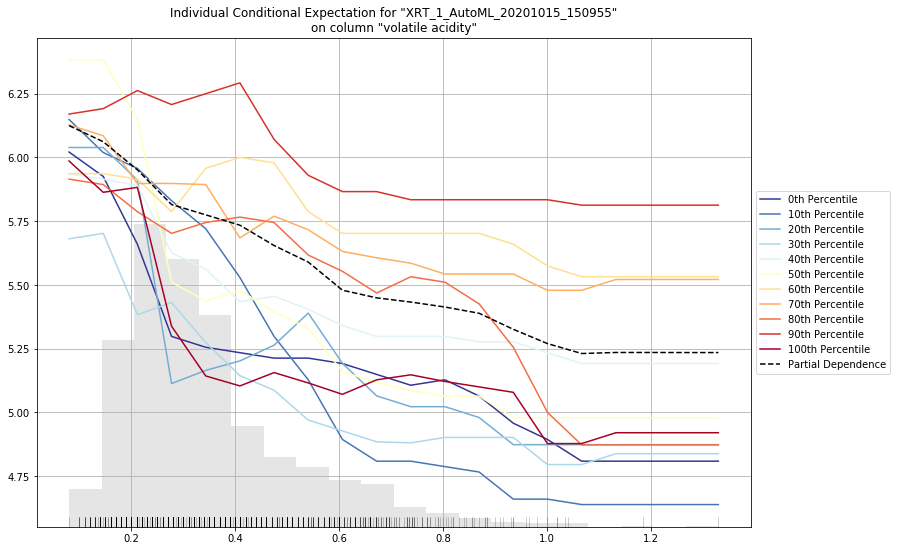

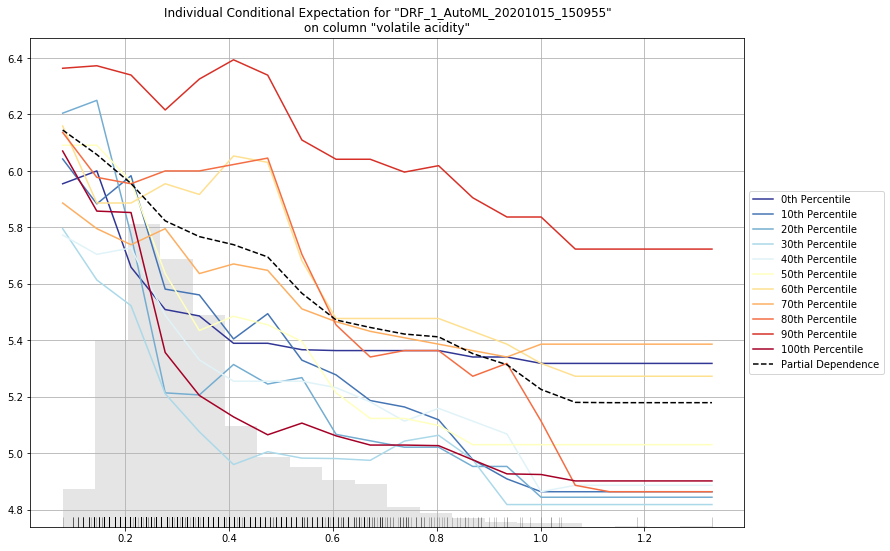

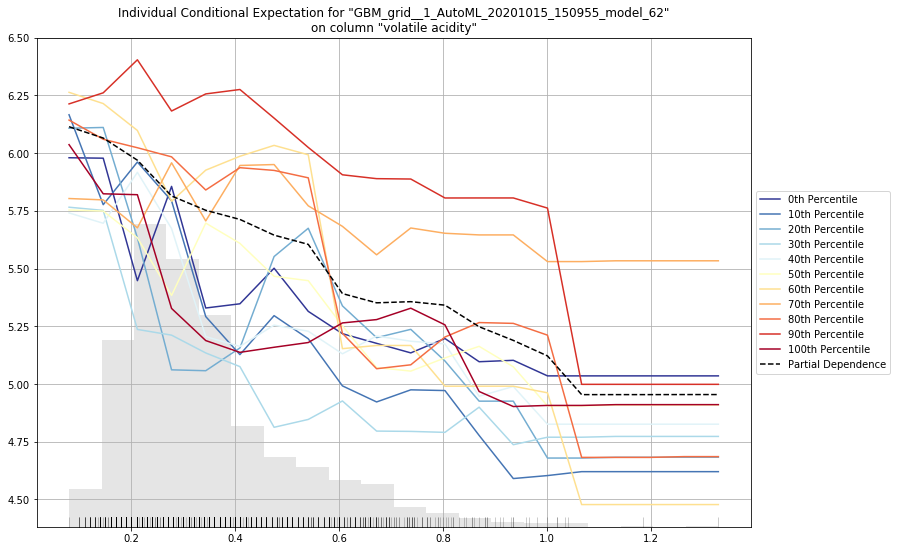

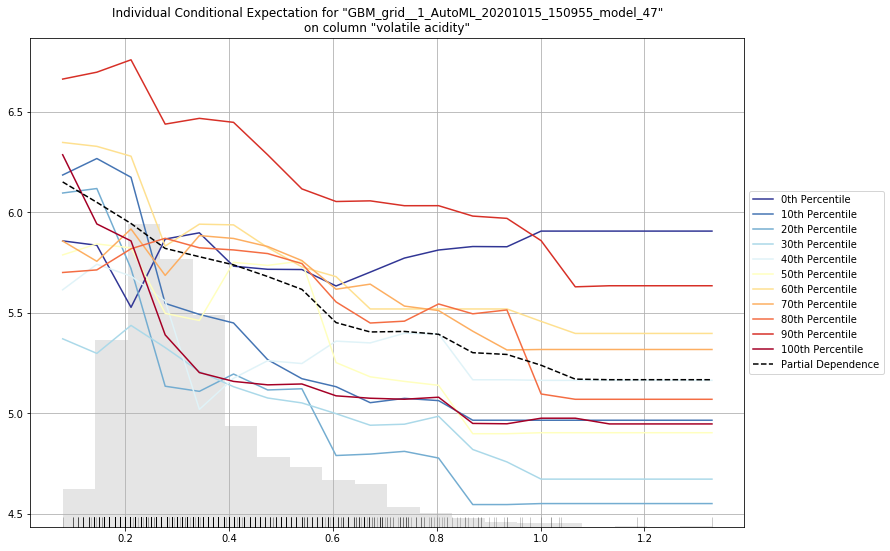

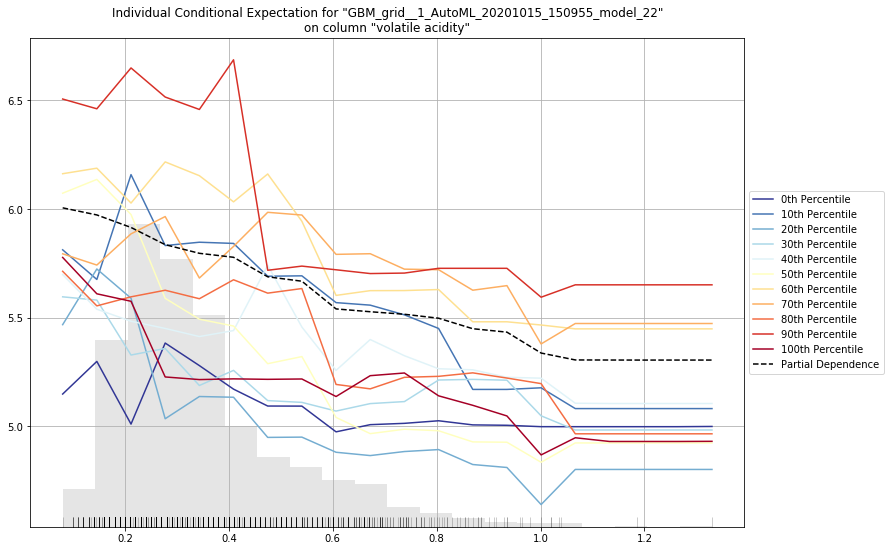

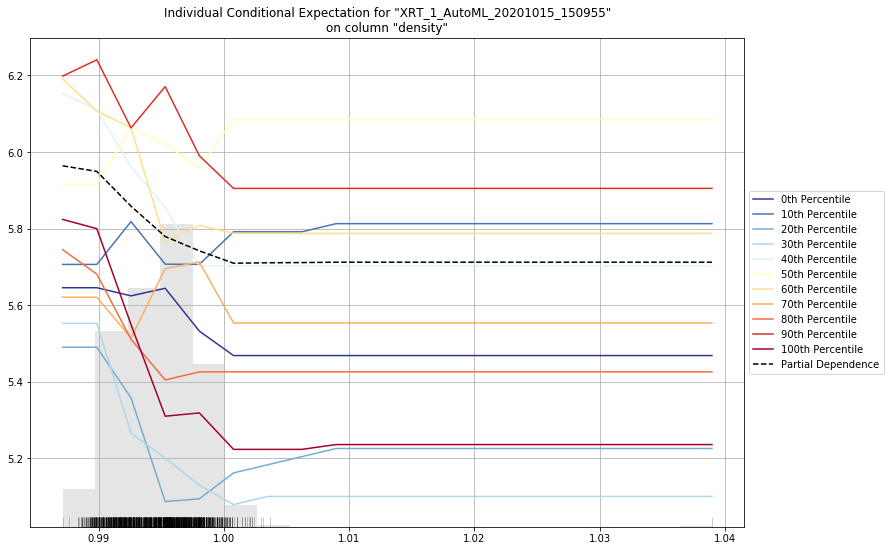

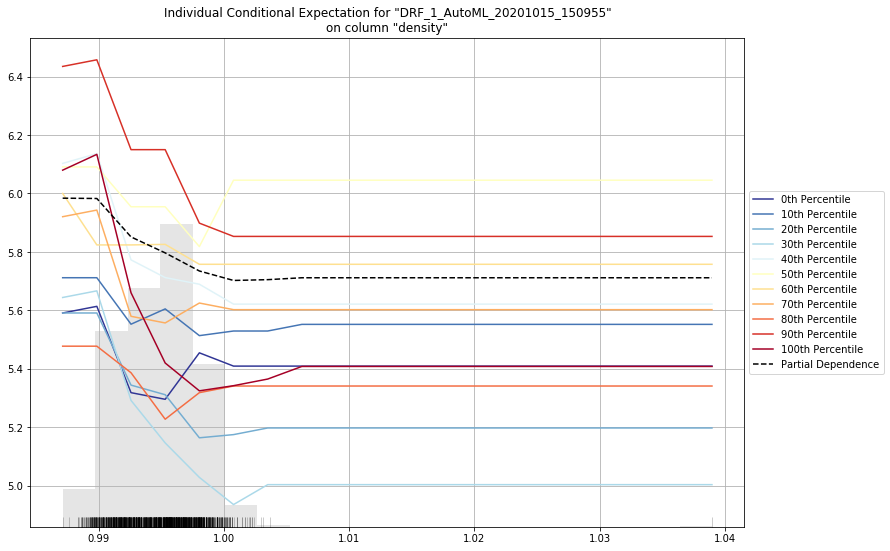

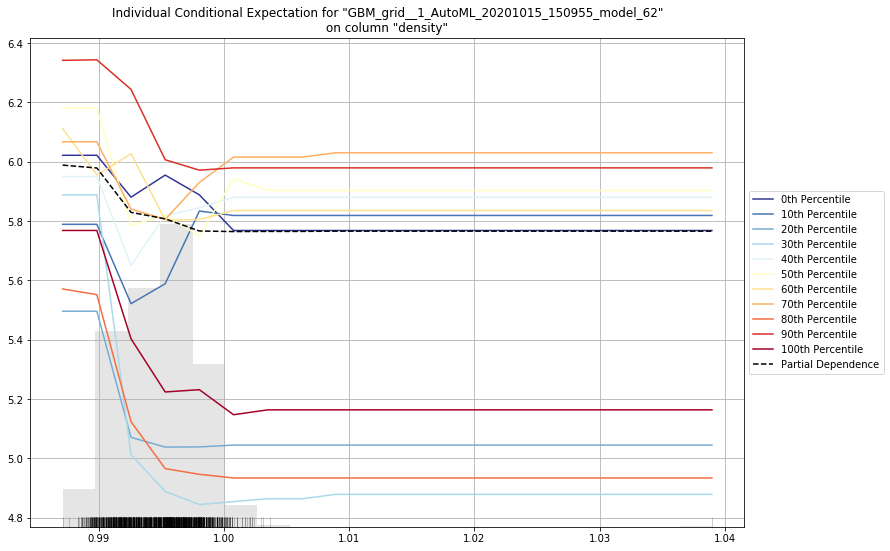

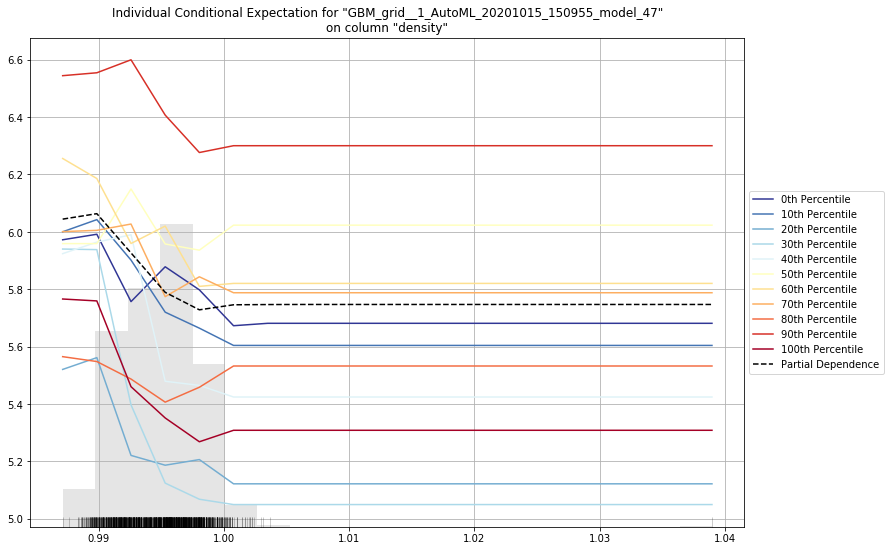

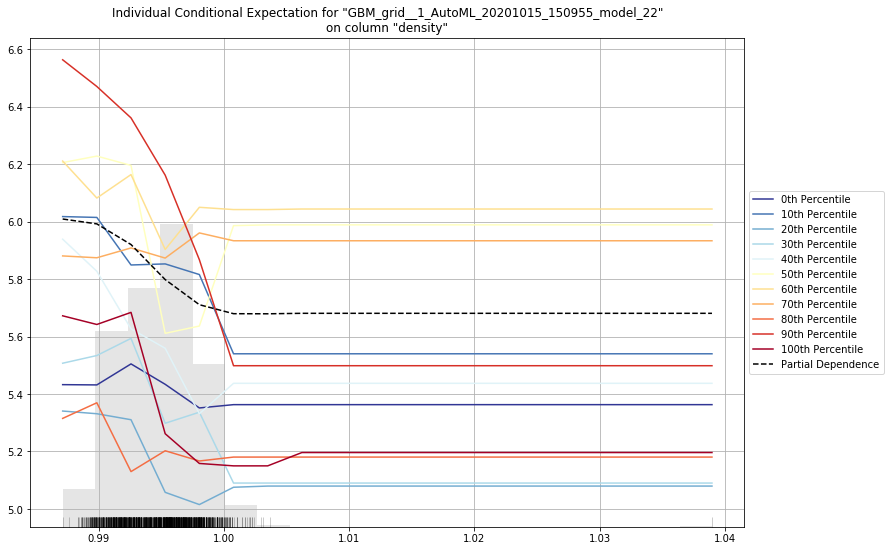

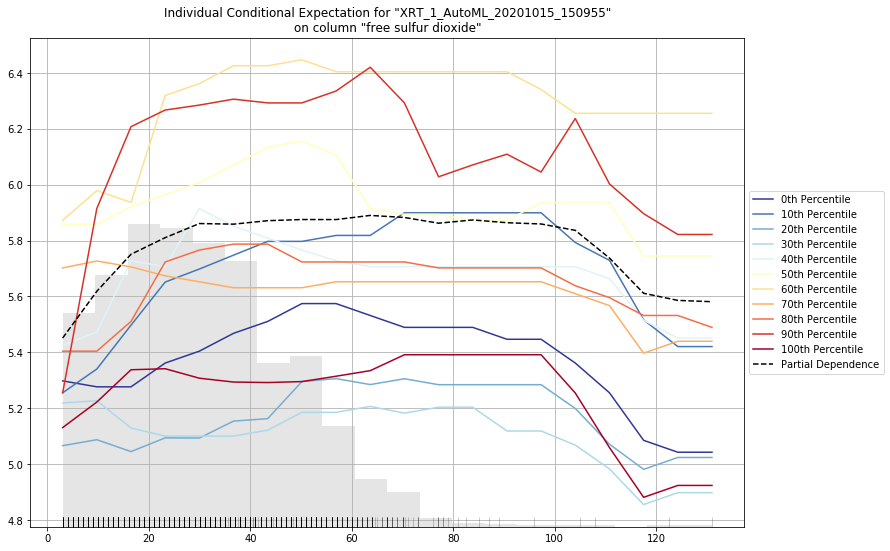

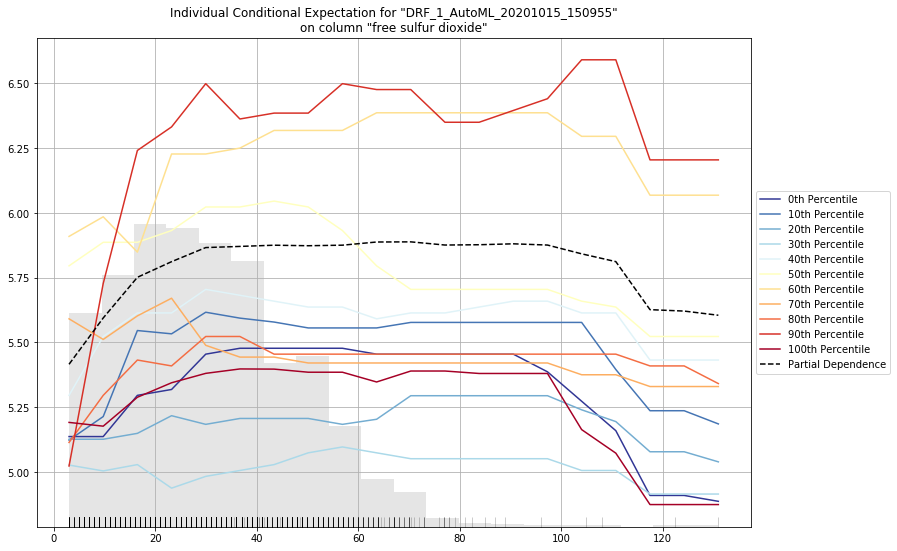

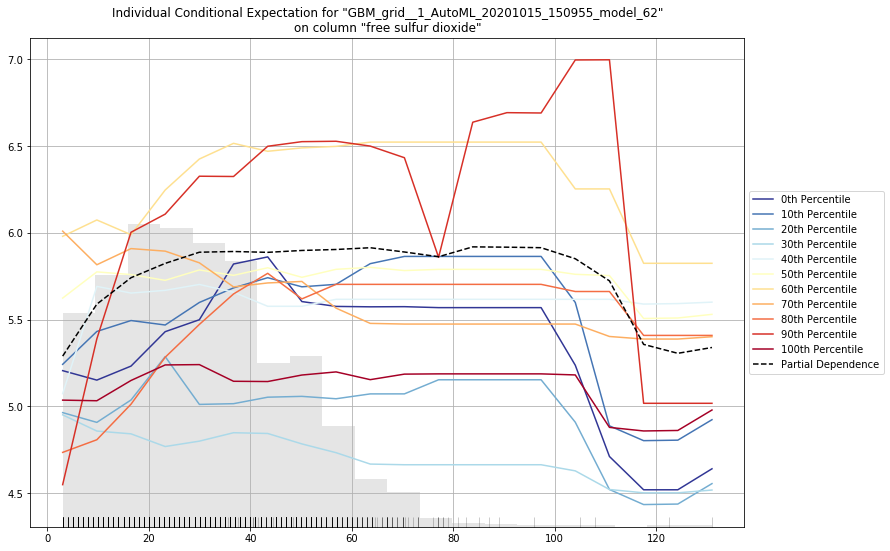

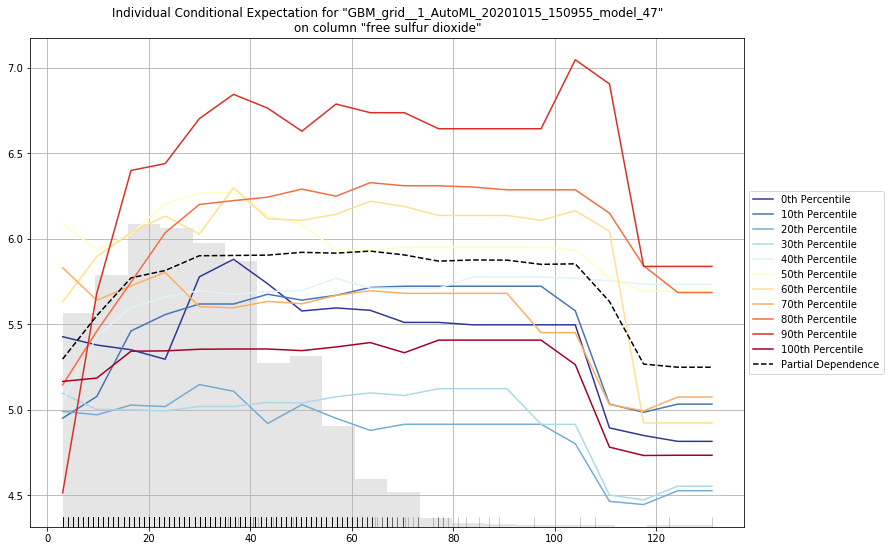

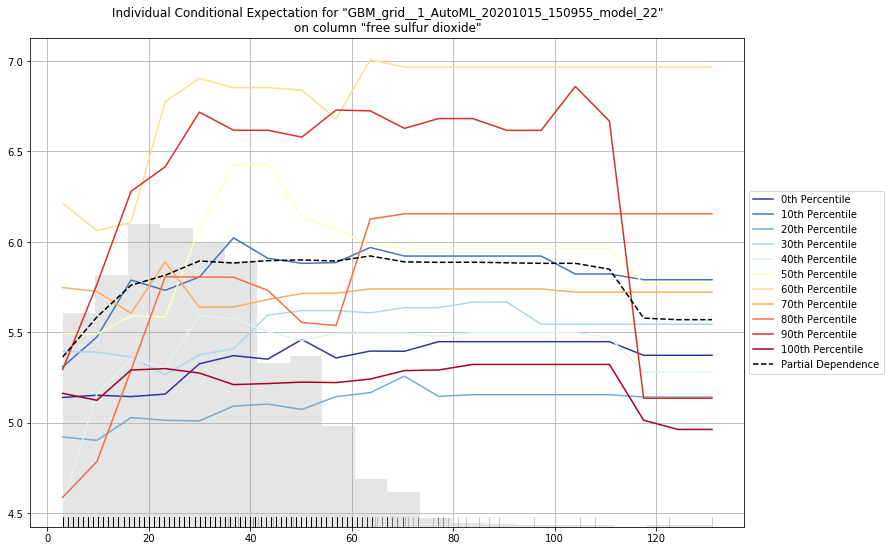

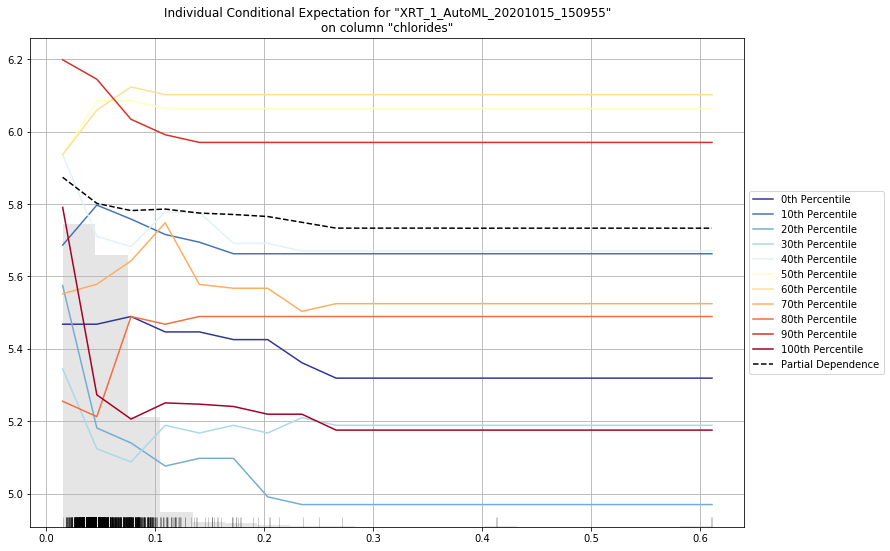

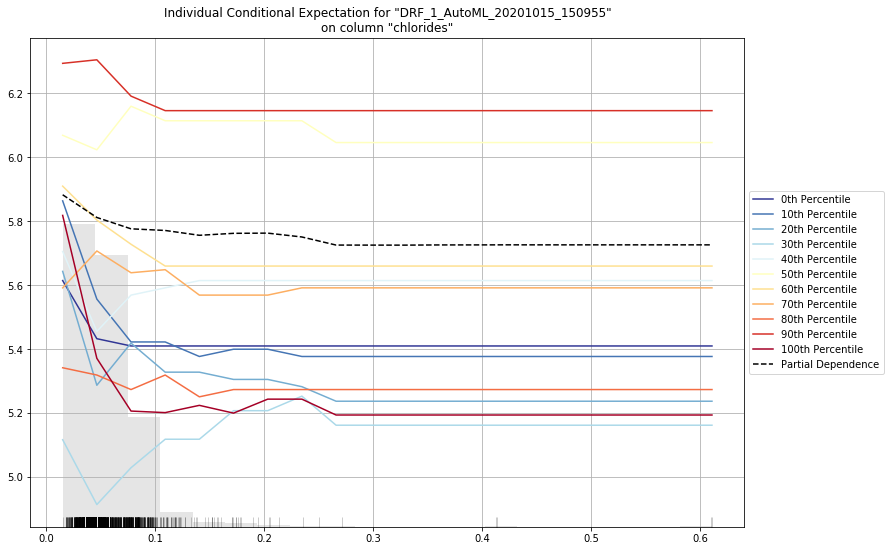

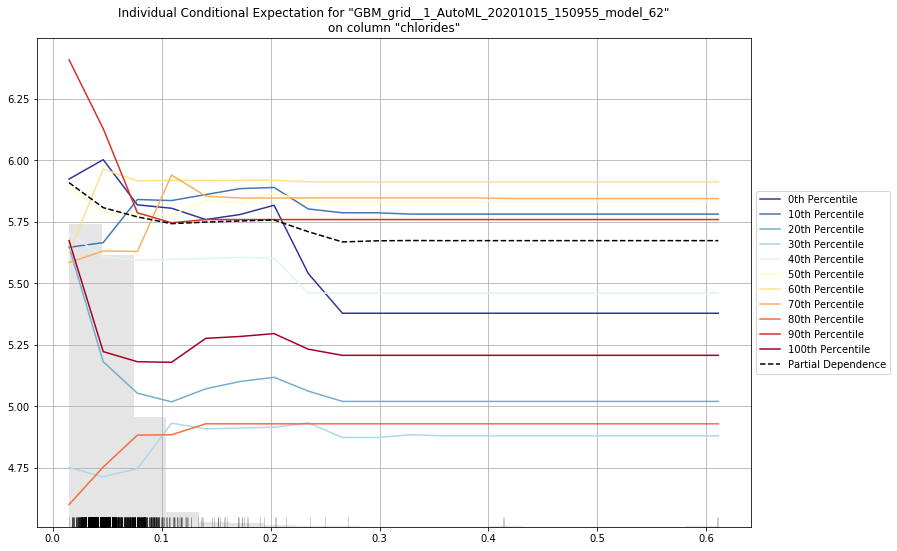

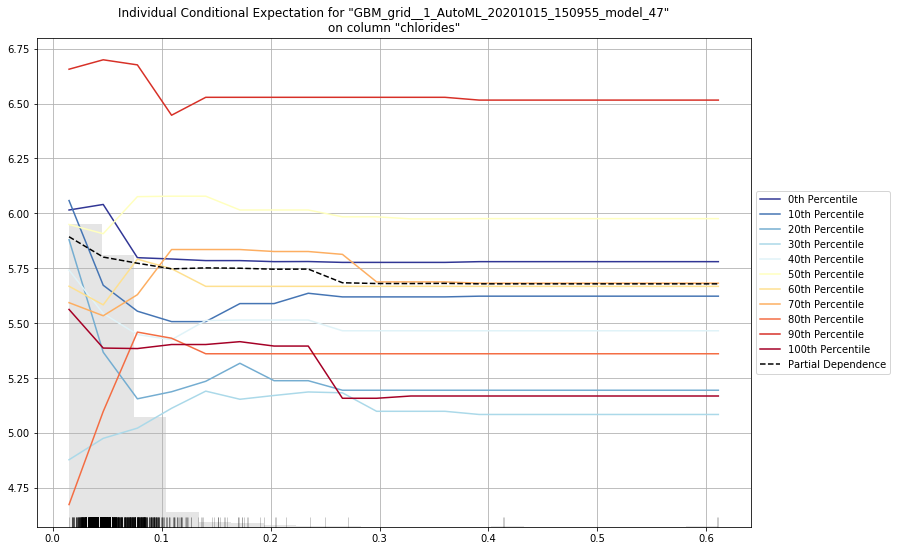

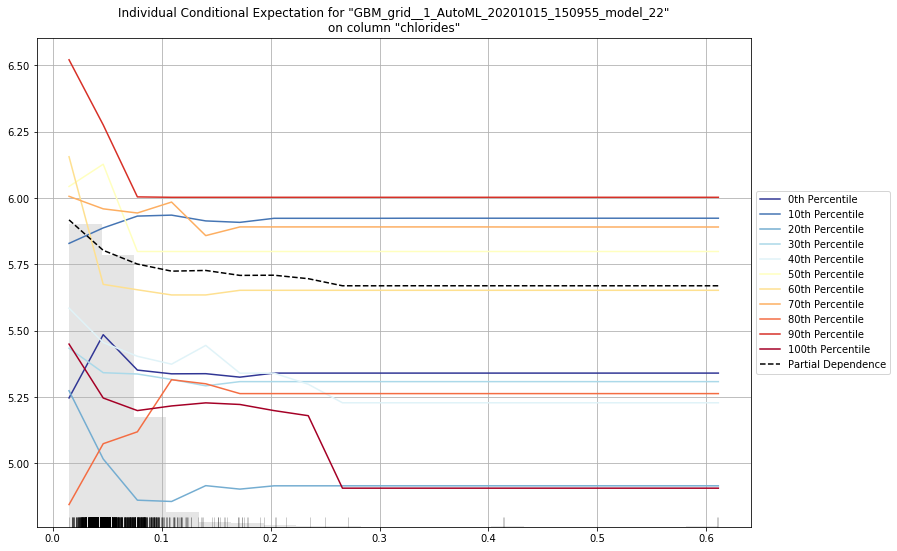

In [12]:
h2o.explain(models, test);

## Local Explanation

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mse rmse mae rmsle predict 
 
 
 XRT_1_AutoML_20201015_150955 0.353535 0.594588 0.433637 0.0892888 5.75815 
 DRF_1_AutoML_20201015_150955 0.354127 0.595086 0.436 0.0894088 5.82689 
 GBM_grid__1_AutoML_20201015_150955_model_22 0.355599 0.596321 0.399963 0.0898248 5.98826 
 GBM_grid__1_AutoML_20201015_150955_model_47 0.359506 0.599588 0.418435 0.0899363 5.94553 
 GBM_grid__1_AutoML_20201015_150955_model_62 0.367822 0.606484 0.4097 0.0913209 5.95924

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

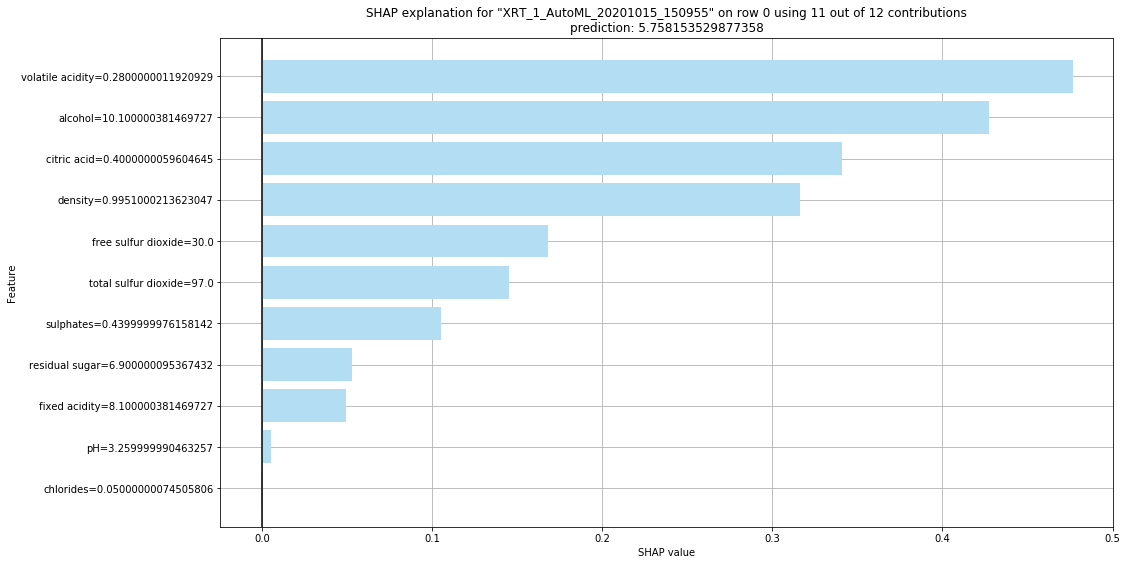

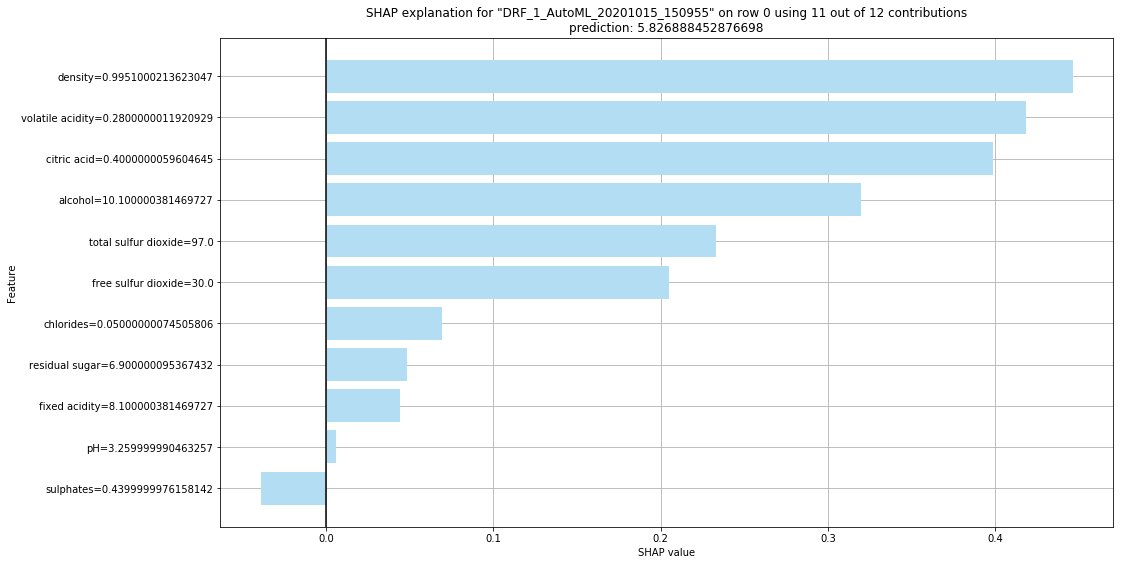

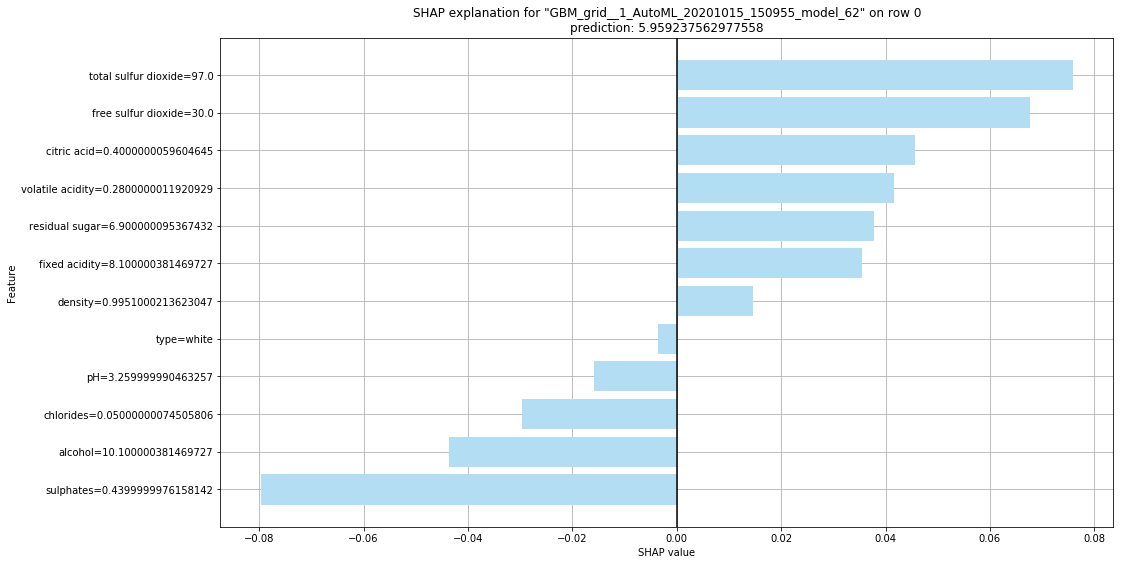

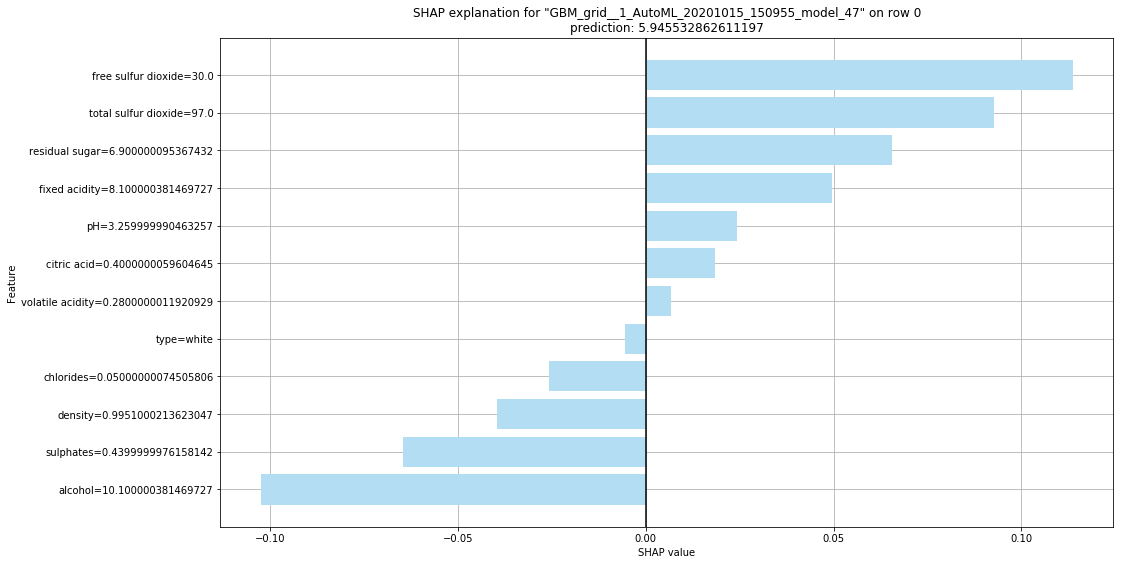

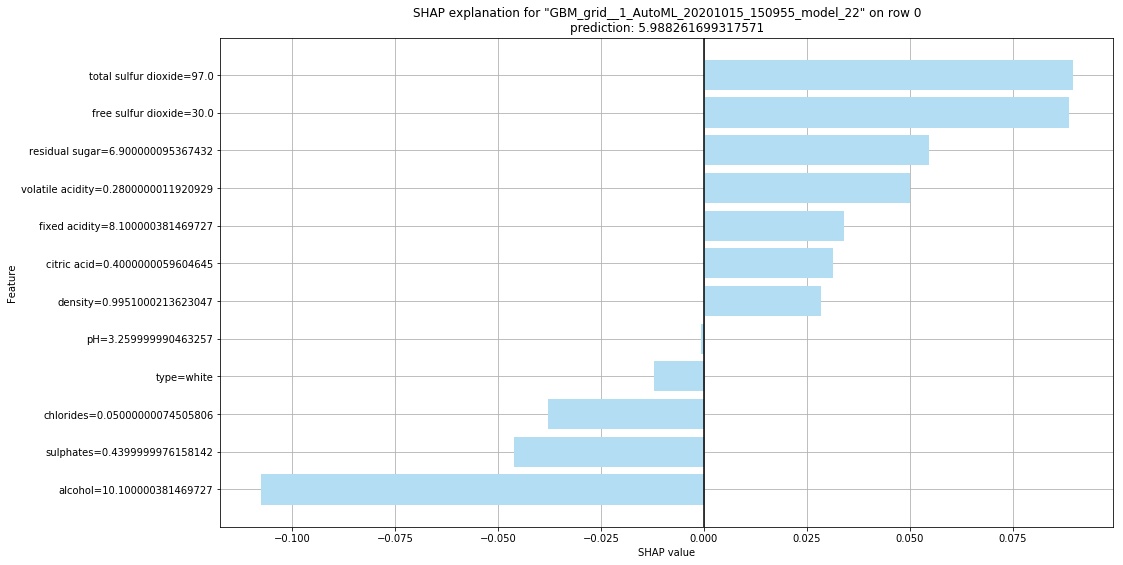

In [13]:
h2o.explain_row(models, test, 0);